In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Helpers

In [0]:
def save_graph(name):
  if not (name in listdir()):
    plt.savefig(name, bbox_inches="tight")

def save_graph2(name):
  if not (name in listdir()):
    fig.savefig(name, bbox_inches="tight")

def graph_p(hor_values, ver_values, g_type=0, 
          hor_label='', ver_label='', title='', 
          show_save=True, first=True, image=False):
  options = {0: plt.plot, 1: plt.bar}
  # Creación y configuración del gráfico:
  if first:
    fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')
    plt.tick_params(axis ='x', rotation = 60) 
  options[g_type](hor_values, ver_values, color ='tomato', linewidth=3)
  plt.xlabel(hor_label)
  plt.ylabel(ver_label)
  plt.title(title)
  if image:
    img = plt.imread("mapa-horizontal-completo.png")
    plt.imshow(img)
  # Se guarda el gráfico en el drive y se muestra:
  if show_save:
    save_graph(title.lower().replace(' ','_') + '.jpg')
    
    plt.close() 


# Proyecto 4 - Probabilidad y Estadística
## Análisis de datos de salud de a pobalción estadonidense.

## Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import getcwd, chdir, listdir
from scipy.stats import trim_mean as tm

In [0]:
#chdir('/content/drive/My Drive/Proyecto 04/Imagenes')

## Definiciones de Clases, Funciones y Variables

In [0]:
def char(c):
  '''
  Cambia los carrácteres que no son alfanuméricos por un guión bajo.
  '''
  if c.isalnum():
    return c
  return '_'


def modify_text(text, lenght=25):
  '''
  Convierte un texto a "snake_case" con un máximo de carácteres dado.
  '''
  return ''.join(map(char, text)).lower()[:lenght+1]


def count(df):
  '''
  Usa el número de sequencia presente en todas las filas de las bases de datos
  para contar la cantidad de personas.
  '''
  return df.respondent_sequence_number.count()

## Formatos y Configuraciones

In [0]:
sns.set(style='whitegrid')

##  Carga de Datos

LINKS

Demografía: https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DEMO_H.htm

Presión Sanguínea: https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/BPX_H.htm

Medidas Corporales:: https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/BMX_H.htm

Resultados de Laboratorio: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory&CycleBeginYear=2013







In [0]:
dem       = pd.read_csv("/content/drive/My Drive/Classroom/Machine Learning C3 - 2 GRU/Proyecto 4 - Probabilidades y Estadistica/demographic_final.csv")
bp        = pd.read_csv("/content/drive/My Drive/Classroom/Machine Learning C3 - 2 GRU/Proyecto 4 - Probabilidades y Estadistica/examination_blood_preasure.csv")
bm        = pd.read_csv("/content/drive/My Drive/Classroom/Machine Learning C3 - 2 GRU/Proyecto 4 - Probabilidades y Estadistica/examination_body_measures.csv")
lab_res   = pd.read_csv("/content/drive/My Drive/Classroom/Machine Learning C3 - 2 GRU/Proyecto 4 - Probabilidades y Estadistica/laboratory_results.csv                     ")

In [0]:
readable_col_names = ['Respondent sequence number',  #CAT_ORD
                      'Data release cycle',     #CAT_ORD
                      'Interview/Examination status', #CAT_DIC
                      'Gender', #CAT_DIC
                      'Age in years at screening', #NUM_DIS
                      'Age in months at screening (for childs under 2 years old)', #NUM_DIS
                      'Race/Hispanic origin', #CAT_NO_ORD
                      'Race/Hispanic origin w/ NH Asian', #CAT_NO_ORD
                      'Six month time period', #CAT_ORD
                      'Age in months at exam (0 - 19 years)', #NUM_DIS
                      'Served active duty in US Armed Forces', #CAT_DIC
                      'Served in a foreign country', #CAT_DIC
                      'Country of birth', #CAT_NO_ORD
                      'Citizenship status', #CAT_DIC
                      'Length of time in US', #CAT_ORD
                      'Education level (Children/Youth 6-19)', #CAT_ORD
                      'Education level (20+ years)', #CAT_ORD
                      'Marital status', #CAT_NO_ORD
                      'Pregnancy status at exam', #CAT_NO_ORD
                      'Language of SP Interview', #CAT_DIC
                      'Total number of people in the Household', #NUM_DIS
                      'Annual household income' #CAT_ORD
                      ]

readable_bm_names = ['Respondent sequence number', #NUM_DIS
                     'Body Measures Component Status Code', #CAT_NO_ORD
                     'Weight (kg)', #NUM_CON
                     'Recumbent Length (cm)', #NUM_CON
                     'Head Circumference (cm)', #NUM_CON
                     'Standing Height (cm)', #NUM_CON
                     'Body Mass Index (kg/m**2)', #NUM_CON
                     'BMI Category - Children/Youth', #CAT_ORD
                     'Upper Leg Length (cm)', #NUM_CON
                     'Upper Arm Length (cm)', #NUM_CON
                     'Arm Circumference (cm)',#NUM_CON 
                     'Waist Circumference (cm)', #NUM_CON
                     ]

readable_bp_names = ['Respondent sequence number', #NUM_DIS
                     '60 sec HR (30 sec HR * 2)', #NUM_
                     'Arm selected', 
                     '60 sec. pulse (30 sec. pulse * 2)',
                     'Pulse regular or irregular?',
                     'Systolic: Blood pres (1st rdg) mm Hg',
                     'Diastolic: Blood pres (1st rdg) mm Hg',
                     'Systolic: Blood pres (2nd rdg) mm Hg',
                     'Diastolic: Blood pres (2nd rdg) mm Hg',
                     'Systolic: Blood pres (3rd rdg) mm Hg',
                     'Diastolic: Blood pres (3rd rdg) mm Hg',
                     ]

readable_lab_names = ['Respondent sequence number', #NUM_DIS
                      'Hepatitis A antibody', #CAT_BIN
                      'Urinary Chlamydia', #CAT_BIN
                      'Direct HDL-Cholesterol (mg/dL)', #NUM_
                      'Triglyceride (mg/dL)', #NUM_
                      'LDL-cholesterol (mg/dL)', #NUM_
                      'Total Cholesterol( mg/dL)', #NUM_
                      'Albumin, urine (mg/L)', #NUM_
                      'Urinary Creatinine', #NUM_
                      'Hepatitis B core antibody', #CAT_BIN
                      'Insulin (uU/mL)', #NUM_CON
                      'Pregnancy test result', #CAT_BIN
                      'Total calcium (mg/dL)', #NUM_CON
                      ]
                      


# dic_col_names = dict(zip(dem.columns.values, readable_col_names))

In [0]:
# Nombres de columnas legibles:

# Podrían ser poperties si se tratan os datos con POO
dem.columns = list(map(modify_text, readable_col_names))
bm.columns = list(map(modify_text, readable_bm_names))
bp.columns = list(map(modify_text, readable_bp_names))
lab_res.columns = list(map(modify_text, readable_lab_names))

## Análisis Exploratorio Inicial

In [0]:
dfs = {'demography': dem, 'blood_preasure': bp, 'body_measure': bm, 
       'lab_results': lab_res}

def analizar_datos(db=None):
  if db:
    print('La base de datos tiene {} filas y {} columnas.\n'.format(dfs[db].shape[0], dfs[db].shape[1]))
    display(dfs[db].head(3))
    display(dfs[db].describe())
    display(dfs[db].describe().sum(axis=1))
    print()
    display(dfs[db].info())
    print('\n'+ '_'*200 + '\n')
  for db in dfs.keys():
    print('La base de datos "{}" tiene {} filas y {} columnas.\n'.format(db, dfs[db].shape[0], dfs[db].shape[1]))
    display(dfs[db].head(3))
    display(dfs[db].describe())
    display(dfs[db].describe().sum(axis=1))
    print()
    display(dfs[db].info())
    print('\n'+ '_'*200 + '\n')

analizar_datos()

La base de datos "demography" tiene 10175 filas y 22 columnas.



,respondent_sequence_number,data_release_cycle,interview_examination_stat,gender,age_in_years_at_screening,age_in_months_at_screening,race_hispanic_origin,race_hispanic_origin_w__nh,six_month_time_period,age_in_months_at_exam__0__,served_active_duty_in_us_a,served_in_a_foreign_countr,country_of_birth,citizenship_status,length_of_time_in_us,education_level__children_,education_level__20__years,marital_status,pregnancy_status_at_exam,language_of_sp_interview,total_number_of_people_in_,annual_household_income
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,1.0,1.0,1,1.0,NaN,NaN,3.0,4.0,NaN,1,3,4.0
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,NaN,1,4,7.0
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,1.0,1.0,1,1.0,NaN,NaN,4.0,1.0,NaN,1,2,10.0


,respondent_sequence_number,data_release_cycle,interview_examination_stat,gender,age_in_years_at_screening,age_in_months_at_screening,race_hispanic_origin,race_hispanic_origin_w__nh,six_month_time_period,age_in_months_at_exam__0__,served_active_duty_in_us_a,served_in_a_foreign_countr,country_of_birth,citizenship_status,length_of_time_in_us,education_level__children_,education_level__20__years,marital_status,pregnancy_status_at_exam,language_of_sp_interview,total_number_of_people_in_,annual_household_income
count,10175.000000,10175.0,10175.000000,10175.000000,10175.000000,673.000000,10175.000000,10175.000000,9813.000000,4213.000000,6261.000000,543.000000,10175.000000,10171.000000,1908.000000,2803.000000,5769.000000,5769.000000,1309.000000,10175.000000,10175.000000,10042.000000
mean,78644.000000,8.0,1.964423,1.508305,31.484128,10.341753,3.091892,3.289828,1.508509,107.478519,1.914071,1.493554,1.227027,1.097532,8.837526,6.162326,3.518807,2.571850,2.022154,1.105651,3.874693,10.884983
std,2937.413829,0.0,0.185243,0.499956,24.421651,6.885479,1.263305,1.613241,0.499953,69.774776,0.288704,0.594761,1.830533,0.341097,17.593642,5.861571,1.236032,2.626299,0.347949,0.307406,1.722184,13.878864
min,73557.000000,8.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,76100.500000,8.0,2.000000,1.000000,10.000000,5.000000,2.000000,2.000000,1.000000,45.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,5.000000
50%,78644.000000,8.0,2.000000,2.000000,26.000000,9.000000,3.000000,3.000000,2.000000,103.000000,2.000000,1.000000,1.000000,1.000000,5.000000,5.000000,4.000000,1.000000,2.000000,1.000000,4.000000,8.000000
75%,81187.500000,8.0,2.000000,2.000000,52.000000,16.000000,4.000000,4.000000,2.000000,166.000000,2.000000,2.000000,1.000000,1.000000,7.000000,9.000000,5.000000,5.000000,2.000000,1.000000,5.000000,14.000000
max,83731.000000,8.0,2.000000,2.000000,80.000000,24.000000,5.000000,7.000000,2.000000,239.000000,7.000000,9.000000,99.000000,9.000000,99.000000,99.000000,9.000000,99.000000,3.000000,2.000000,7.000000,99.000000


count    161024.000000
mean      78857.377532
std        3089.186472
min       73581.000000
25%       76201.500000
50%       78837.000000
75%       81497.500000
max       84641.000000
dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 22 columns):
respondent_sequence_number    10175 non-null int64
data_release_cycle            10175 non-null int64
interview_examination_stat    10175 non-null int64
gender                        10175 non-null int64
age_in_years_at_screening     10175 non-null int64
age_in_months_at_screening    673 non-null float64
race_hispanic_origin          10175 non-null int64
race_hispanic_origin_w__nh    10175 non-null int64
six_month_time_period         9813 non-null float64
age_in_months_at_exam__0__    4213 non-null float64
served_active_duty_in_us_a    6261 non-null float64
served_in_a_foreign_countr    543 non-null float64
country_of_birth              10175 non-null int64
citizenship_status            10171 non-null float64
length_of_time_in_us          1908 non-null float64
education_level__children_    2803 non-null float64
education_level__20__years    5769 non-null float64
marital_status 

None


________________________________________________________________________________________________________________________________________________________________________________________________________

La base de datos "blood_preasure" tiene 9813 filas y 11 columnas.



,respondent_sequence_number,60_sec_hr__30_sec_hr___2_,arm_selected,60_sec__pulse__30_sec__pul,pulse_regular_or_irregular,systolic__blood_pres__1st_,diastolic__blood_pres__1st,systolic__blood_pres__2nd_,diastolic__blood_pres__2nd,systolic__blood_pres__3rd_,diastolic__blood_pres__3rd
0,73557,NaN,1.0,86.0,1.0,122.0,72.0,114.0,76.0,102.0,74.0
1,73558,NaN,1.0,74.0,1.0,156.0,62.0,160.0,80.0,156.0,42.0
2,73559,NaN,1.0,68.0,1.0,140.0,90.0,140.0,76.0,146.0,80.0


,respondent_sequence_number,60_sec_hr__30_sec_hr___2_,arm_selected,60_sec__pulse__30_sec__pul,pulse_regular_or_irregular,systolic__blood_pres__1st_,diastolic__blood_pres__1st,systolic__blood_pres__2nd_,diastolic__blood_pres__2nd,systolic__blood_pres__3rd_,diastolic__blood_pres__3rd
count,9813.000000,1961.000000,7535.000000,7549.000000,9511.000000,7172.000000,7172.000000,7409.000000,7409.000000,7408.000000,7408.000000
mean,78644.559971,105.534931,1.008096,74.416214,1.013668,118.123536,65.769939,118.230530,65.237954,117.999460,65.035637
std,2938.592266,21.516295,0.116644,12.367969,0.116116,18.078149,14.960108,18.181197,15.700239,18.079852,16.233174
min,73557.000000,60.000000,1.000000,40.000000,1.000000,66.000000,0.000000,66.000000,0.000000,62.000000,0.000000
25%,76092.000000,88.000000,1.000000,66.000000,1.000000,106.000000,58.000000,106.000000,58.000000,106.000000,58.000000
50%,78643.000000,102.000000,1.000000,74.000000,1.000000,116.000000,66.000000,116.000000,66.000000,114.000000,68.000000
75%,81191.000000,120.000000,1.000000,82.000000,1.000000,128.000000,76.000000,128.000000,74.000000,128.000000,74.000000
max,83731.000000,178.000000,8.000000,180.000000,2.000000,228.000000,122.000000,230.000000,116.000000,228.000000,118.000000


count    80347.000000
mean     79376.929937
std       3073.942009
min      73853.000000
25%      76740.000000
50%      79367.000000
75%      82003.000000
max      85141.000000
dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 11 columns):
respondent_sequence_number    9813 non-null int64
60_sec_hr__30_sec_hr___2_     1961 non-null float64
arm_selected                  7535 non-null float64
60_sec__pulse__30_sec__pul    7549 non-null float64
pulse_regular_or_irregular    9511 non-null float64
systolic__blood_pres__1st_    7172 non-null float64
diastolic__blood_pres__1st    7172 non-null float64
systolic__blood_pres__2nd_    7409 non-null float64
diastolic__blood_pres__2nd    7409 non-null float64
systolic__blood_pres__3rd_    7408 non-null float64
diastolic__blood_pres__3rd    7408 non-null float64
dtypes: float64(10), int64(1)
memory usage: 843.4 KB


None


________________________________________________________________________________________________________________________________________________________________________________________________________

La base de datos "body_measure" tiene 9813 filas y 12 columnas.



,respondent_sequence_number,body_measures_component_st,weight__kg_,recumbent_length__cm_,head_circumference__cm_,standing_height__cm_,body_mass_index__kg_m__2_,bmi_category___children_yo,upper_leg_length__cm_,upper_arm_length__cm_,arm_circumference__cm_,waist_circumference__cm_
0,73557,1,78.3,NaN,NaN,171.3,26.7,NaN,39.2,40.2,35.3,100.0
1,73558,1,89.5,NaN,NaN,176.8,28.6,NaN,40.0,41.5,34.7,107.6
2,73559,1,88.9,NaN,NaN,175.3,28.9,NaN,40.0,41.0,33.5,109.2


,respondent_sequence_number,body_measures_component_st,weight__kg_,recumbent_length__cm_,head_circumference__cm_,standing_height__cm_,body_mass_index__kg_m__2_,bmi_category___children_yo,upper_leg_length__cm_,upper_arm_length__cm_,arm_circumference__cm_,waist_circumference__cm_
count,9813.000000,9813.000000,9723.000000,1065.000000,229.000000,9067.000000,9055.000000,3523.000000,7402.000000,9301.000000,9301.000000,8661.000000
mean,78644.559971,1.139916,62.599054,81.631174,41.566812,155.883759,25.678244,2.488504,38.577709,33.141006,28.485765,87.272047
std,2938.592266,0.499377,32.331616,14.219097,2.525734,23.176270,7.955137,0.825881,4.047820,7.409420,7.961971,22.542605
min,73557.000000,1.000000,3.100000,48.600000,33.800000,79.700000,12.100000,1.000000,24.400000,9.900000,10.400000,40.200000
25%,76092.000000,1.000000,37.950000,69.700000,39.700000,149.500000,19.700000,2.000000,36.000000,30.500000,22.600000,71.200000
50%,78643.000000,1.000000,65.300000,82.800000,41.800000,162.000000,24.700000,2.000000,38.600000,35.500000,29.300000,87.800000
75%,81191.000000,1.000000,83.500000,93.200000,43.500000,171.050000,30.200000,3.000000,41.300000,38.100000,34.000000,102.800000
max,83731.000000,4.000000,222.600000,115.100000,46.800000,202.600000,82.900000,4.000000,51.900000,47.900000,59.400000,177.900000


count    86953.000000
mean     79203.023962
std       3062.087194
min      73821.200000
25%      76571.850000
50%      79213.800000
75%      81832.650000
max      84746.100000
dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 12 columns):
respondent_sequence_number    9813 non-null int64
body_measures_component_st    9813 non-null int64
weight__kg_                   9723 non-null float64
recumbent_length__cm_         1065 non-null float64
head_circumference__cm_       229 non-null float64
standing_height__cm_          9067 non-null float64
body_mass_index__kg_m__2_     9055 non-null float64
bmi_category___children_yo    3523 non-null float64
upper_leg_length__cm_         7402 non-null float64
upper_arm_length__cm_         9301 non-null float64
arm_circumference__cm_        9301 non-null float64
waist_circumference__cm_      8661 non-null float64
dtypes: float64(10), int64(2)
memory usage: 920.1 KB


None


________________________________________________________________________________________________________________________________________________________________________________________________________

La base de datos "lab_results" tiene 9813 filas y 13 columnas.



,respondent_sequence_number,hepatitis_a_antibody,urinary_chlamydia,direct_hdl_cholesterol__mg,triglyceride__mg_dl_,ldl_cholesterol__mg_dl_,total_cholesterol__mg_dl_,albumin__urine__mg_l_,urinary_creatinine,hepatitis_b_core_antibody,insulin__uu_ml_,pregnancy_test_result,total_calcium__mg_dl_
0,73557,1.0,NaN,65.0,NaN,NaN,167.0,4.3,NaN,1.0,NaN,NaN,9.5
1,73558,2.0,NaN,50.0,NaN,NaN,170.0,153.0,NaN,2.0,NaN,NaN,9.2
2,73559,2.0,NaN,60.0,51.0,56.0,126.0,11.9,NaN,2.0,5.83,NaN,8.9


,respondent_sequence_number,hepatitis_a_antibody,urinary_chlamydia,direct_hdl_cholesterol__mg,triglyceride__mg_dl_,ldl_cholesterol__mg_dl_,total_cholesterol__mg_dl_,albumin__urine__mg_l_,urinary_creatinine,hepatitis_b_core_antibody,insulin__uu_ml_,pregnancy_test_result,total_calcium__mg_dl_
count,9813.000000,8264.000000,2174.000000,7624.000000,3146.000000,3105.000000,7624.000000,8052.000000,2690.000000,7656.000000,3093.000000,1261.000000,6511.000000
mean,78644.559971,1.417836,1.972861,53.105194,112.306739,106.221256,179.534103,41.218854,127.578439,1.942921,13.526809,1.969072,9.486377
std,2938.592266,0.493233,0.162526,15.230838,115.607060,34.988663,40.954000,238.910226,81.982279,0.232009,18.638388,0.251651,0.367961
min,73557.000000,1.000000,1.000000,10.000000,13.000000,14.000000,69.000000,0.210000,8.000000,1.000000,0.140000,1.000000,7.600000
25%,76092.000000,1.000000,2.000000,42.000000,60.000000,81.000000,151.000000,4.500000,65.000000,2.000000,6.080000,2.000000,9.200000
50%,78643.000000,1.000000,2.000000,51.000000,88.000000,103.000000,175.000000,8.400000,112.000000,2.000000,9.470000,2.000000,9.500000
75%,81191.000000,2.000000,2.000000,61.000000,133.000000,127.000000,204.000000,17.625000,171.000000,2.000000,15.350000,2.000000,9.700000
max,83731.000000,2.000000,2.000000,173.000000,4233.000000,375.000000,813.000000,9600.000000,659.000000,2.000000,682.480000,3.000000,14.800000


count     71013.000000
mean      79294.840432
std        3486.411099
min       73682.950000
25%       76517.780000
50%       79206.370000
75%       81937.675000
max      100290.280000
dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 13 columns):
respondent_sequence_number    9813 non-null int64
hepatitis_a_antibody          8264 non-null float64
urinary_chlamydia             2174 non-null float64
direct_hdl_cholesterol__mg    7624 non-null float64
triglyceride__mg_dl_          3146 non-null float64
ldl_cholesterol__mg_dl_       3105 non-null float64
total_cholesterol__mg_dl_     7624 non-null float64
albumin__urine__mg_l_         8052 non-null float64
urinary_creatinine            2690 non-null float64
hepatitis_b_core_antibody     7656 non-null float64
insulin__uu_ml_               3093 non-null float64
pregnancy_test_result         1261 non-null float64
total_calcium__mg_dl_         6511 non-null float64
dtypes: float64(12), int64(1)
memory usage: 996.8 KB


None


________________________________________________________________________________________________________________________________________________________________________________________________________



## 1) Tratamiento de Valores Nulos y Outliers

### Gráficos de Valores Nulos

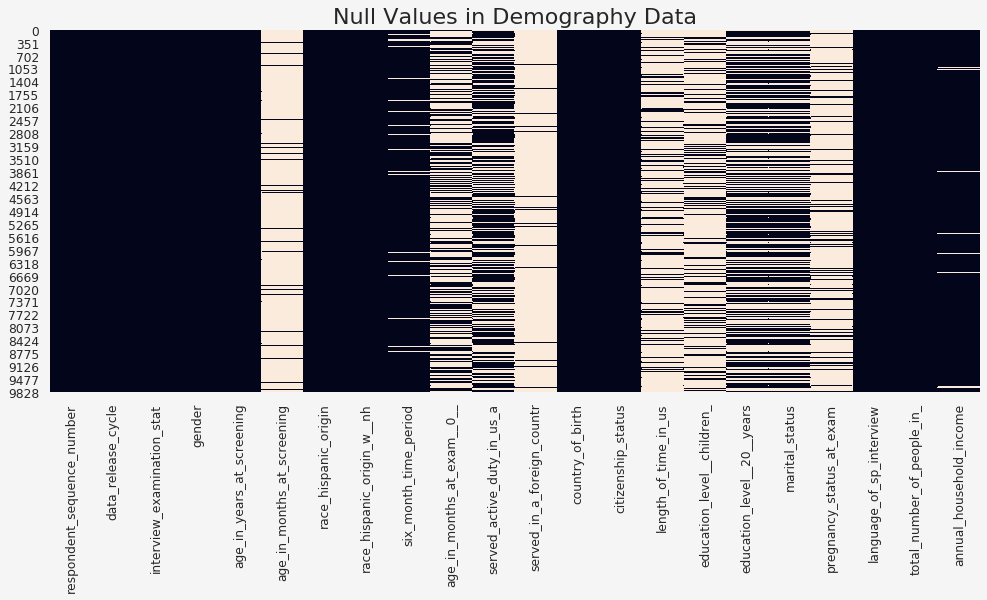

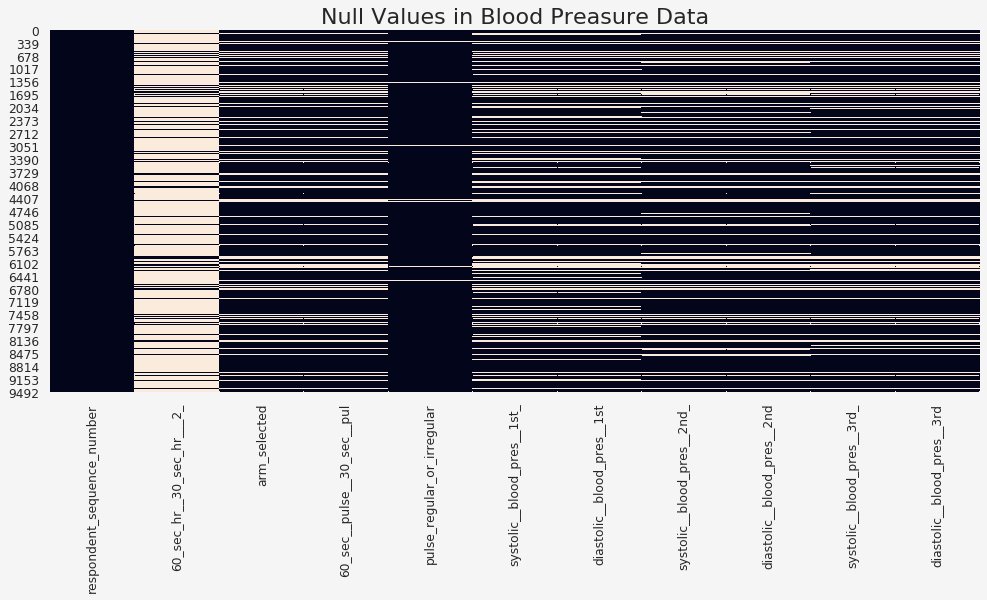

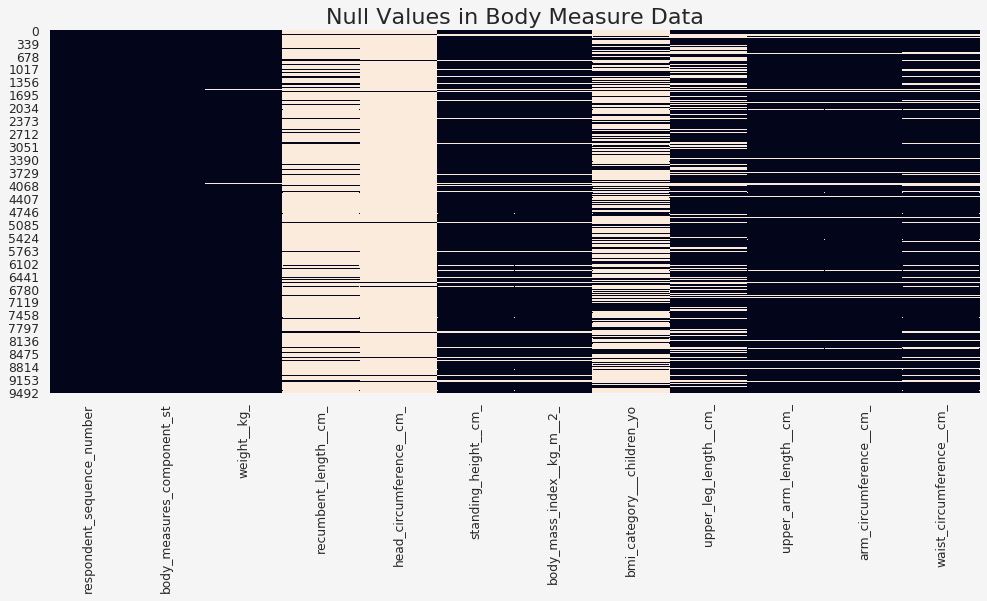

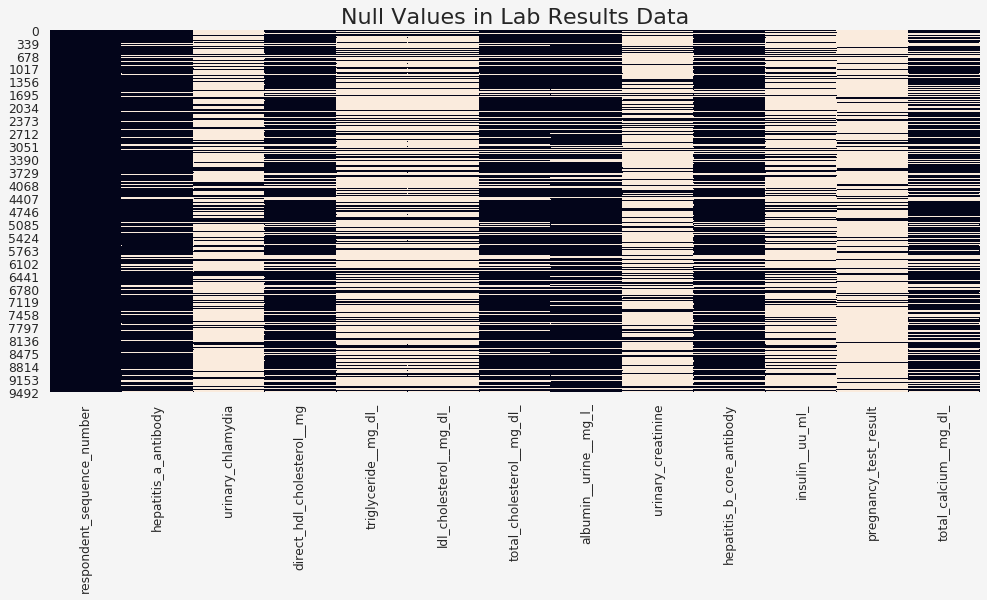

In [0]:

for db in dfs.keys():
  fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')
  sns.heatmap(dfs[db].isnull(), cbar=False)
  plt.title('Null Values in {} Data'.format(db.replace('_',' ').title()), fontsize=20)
  save_graph(modify_text('Null Values in {} Data'.format(db.replace('_',' ').title())))
  plt.show()
  print()

### Identificación de Outliers


In [0]:
def replace_outliers(column, num):
  # Cálculo de la media truncada:
  trim_mean = tm(column.values, 0.15, axis=0)

  # Array de datos repetidos para reemplazar:
  data_to_replace = np.repeat(np.c_[trim_mean, trim_mean], 9, axis=1)
  
  # Cálculo de límites:
  upper_lim = column.mean() + 3*column.std()
  lower_lim = column.mean() - 3*column.std()

  if num:
    try:
      trim_mean = int(trim_mean)
    except:
      pass
  
  # Se encuentran los otliers y se reemplazan por la media de los datos truncados:
  without_ol = column\
  .where(column.gt(lower_lim),trim_mean)\
  .where(column.lt(upper_lim), trim_mean)

  return without_ol
  
def check_columns_num_con(df, columns):
  ''' Elimina otliers en columnas numericas continuas '''
  for column in columns:
    column = modify_text(column)
    df[column] = replace_outliers(df[column], 0)

def check_columns_num_dis(df, columns):
  ''' Elimina otliers en columnas numericas discretas '''
  for column in columns:
    column = modify_text(column)
    df[column] = replace_outliers(df[column], 1)

In [0]:
data_struc = [[dem, [[
            ],[
                'Age in years at screening', #NUM_DIS
                'Age in months at screening (for childs under 2 years old)', #NUM_DIS
                'Age in months at exam (0 - 19 years)', #NUM_DIS
                'Total number of people in the Household', #NUM_DIS
            ]]],
             [bp, [[
                   
             ],[
                '60 sec HR (30 sec HR * 2)', #NUM_DIS
                '60 sec. pulse (30 sec. pulse * 2)', #NUM_DIS
                'Systolic: Blood pres (1st rdg) mm Hg', #NUM_DIS
                'Diastolic: Blood pres (1st rdg) mm Hg', #NUM_DIS
                'Systolic: Blood pres (2nd rdg) mm Hg', #NUM_DIS
                'Diastolic: Blood pres (2nd rdg) mm Hg', #NUM_DIS
                'Systolic: Blood pres (3rd rdg) mm Hg', #NUM_DIS
                'Diastolic: Blood pres (3rd rdg) mm Hg', #NUM_DIS
             ]]],
             [bm, [[
                'Weight (kg)', #NUM_CON
                'Recumbent Length (cm)', #NUM_CON
                'Head Circumference (cm)', #NUM_CON
                'Standing Height (cm)', #NUM_CON
                'Body Mass Index (kg/m**2)', #NUM_CON
                'Upper Leg Length (cm)', #NUM_CON
                'Upper Arm Length (cm)', #NUM_CON
                'Arm Circumference (cm)',#NUM_CON 
                'Waist Circumference (cm)', #NUM_CON 
             ],[
             ]]],
             [lab_res, [[
                'Direct HDL-Cholesterol (mg/dL)', #NUM_CON
                'Triglyceride (mg/dL)', #NUM_CON
                'LDL-cholesterol (mg/dL)', #NUM_CON
                'Total Cholesterol( mg/dL)', #NUM_CON
                'Albumin, urine (mg/L)', #NUM_CON
                'Urinary Creatinine', #NUM_CON
                'Insulin (uU/mL)', #NUM_CON
                'Total calcium (mg/dL)', #NUM_CON        
             ],[
             ]]]
]


In [0]:
for listt in data_struc:
  '''
  Se recorre la estructura de datos con la columnas con datos numéricos
  discretos y continuos. A cada columna se le eliminan los outliers.
  '''
  check_columns_num_con(listt[0], listt[1][0])
  check_columns_num_dis(listt[0], listt[1][1])

## 2) Estudio de Características Demográficas
Realice un estudio de las características demográficas de la encuesta determinando los valores predominantes en cada una de ellas. 

In [0]:
def donut_graph(data, labels, title=''):
  fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
  fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')

  wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

  bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
  kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = "angle,angleA=0,angleB={}".format(ang)
      kw["arrowprops"].update({"connectionstyle": connectionstyle})
      ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                  horizontalalignment=horizontalalignment, **kw)
  
  # save_graph2(title)
  ax.set_title(title)
  if not (title+'.jpg' in listdir()):
    plt.savefig(title+'.jpg', bbox_inches="tight")
  


  plt.show()

Frecuencias de la columna "respondent_sequence_number"


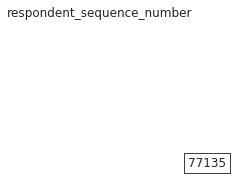

<Figure size 1200x480 with 0 Axes>

,0,frequency,acum_frec,rel_percent_frec
73724,73724,1,1,0.000098
77127,77127,1,2,0.000098
79188,79188,1,3,0.000098
83282,83282,1,4,0.000098
77135,77135,1,5,0.000098





Frecuencias de la columna "data_release_cycle"


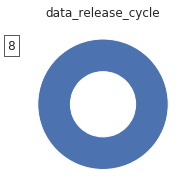

<Figure size 1200x480 with 0 Axes>

,1,frequency,acum_frec,rel_percent_frec
8,8,10175,10175,1.0





Frecuencias de la columna "interview_examination_stat"


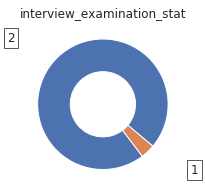

<Figure size 1200x480 with 0 Axes>

,2,frequency,acum_frec,rel_percent_frec
2,2,9813,9813,0.964423
1,1,362,10175,0.035577





Frecuencias de la columna "gender"


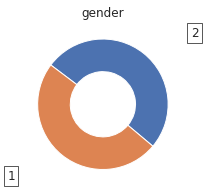

<Figure size 1200x480 with 0 Axes>

,3,frequency,acum_frec,rel_percent_frec
2,2,5172,5172,0.508305
1,1,5003,10175,0.491695





Frecuencias de la columna "age_in_years_at_screening"


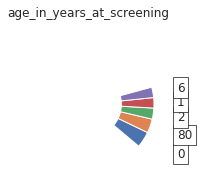

<Figure size 1200x480 with 0 Axes>

,4,frequency,acum_frec,rel_percent_frec
0,0,405,405,0.039803
80,80,352,757,0.034595
2,2,278,1035,0.027322
1,1,262,1297,0.025749
6,6,262,1559,0.025749





Frecuencias de la columna "age_in_months_at_screening"


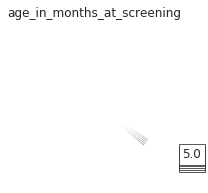

<Figure size 1200x480 with 0 Axes>

,5,frequency,acum_frec,rel_percent_frec
9.0,9.0,44,44,0.004324
6.0,6.0,44,88,0.004324
1.0,1.0,42,130,0.004128
8.0,8.0,39,169,0.003833
5.0,5.0,38,207,0.003735





Frecuencias de la columna "race_hispanic_origin"


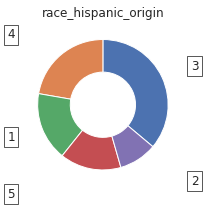

<Figure size 1200x480 with 0 Axes>

,6,frequency,acum_frec,rel_percent_frec
3,3,3674,3674,0.361081
4,4,2267,5941,0.222801
1,1,1730,7671,0.170025
5,5,1544,9215,0.151744
2,2,960,10175,0.094349





Frecuencias de la columna "race_hispanic_origin_w__nh"


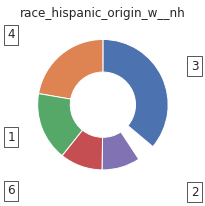

<Figure size 1200x480 with 0 Axes>

,7,frequency,acum_frec,rel_percent_frec
3,3,3674,3674,0.361081
4,4,2267,5941,0.222801
1,1,1730,7671,0.170025
6,6,1074,8745,0.105553
2,2,960,9705,0.094349





Frecuencias de la columna "six_month_time_period"


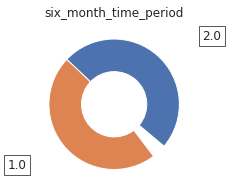

<Figure size 1200x480 with 0 Axes>

,8,frequency,acum_frec,rel_percent_frec
2.0,2.0,4990,4990,0.490418
1.0,1.0,4823,9813,0.474005





Frecuencias de la columna "age_in_months_at_exam__0__"


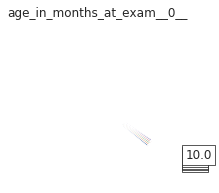

<Figure size 1200x480 with 0 Axes>

,9,frequency,acum_frec,rel_percent_frec
5.0,5.0,43,43,0.004226
7.0,7.0,40,83,0.003931
2.0,2.0,39,122,0.003833
6.0,6.0,37,159,0.003636
10.0,10.0,37,196,0.003636





Frecuencias de la columna "served_active_duty_in_us_a"


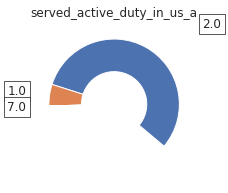

<Figure size 1200x480 with 0 Axes>

,10,frequency,acum_frec,rel_percent_frec
2.0,2.0,5717,5717,0.561867
1.0,1.0,543,6260,0.053366
7.0,7.0,1,6261,0.000098





Frecuencias de la columna "served_in_a_foreign_countr"


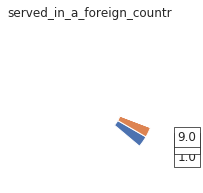

<Figure size 1200x480 with 0 Axes>

,11,frequency,acum_frec,rel_percent_frec
1.0,1.0,282,282,0.027715
2.0,2.0,260,542,0.025553
9.0,9.0,1,543,0.000098





Frecuencias de la columna "country_of_birth"


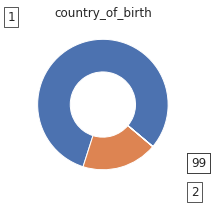

<Figure size 1200x480 with 0 Axes>

,12,frequency,acum_frec,rel_percent_frec
1,1,8262,8262,0.811990
2,2,1908,10170,0.187518
77,77,4,10174,0.000393
99,99,1,10175,0.000098





Frecuencias de la columna "citizenship_status"


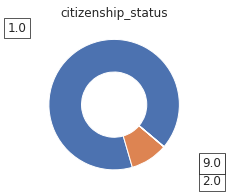

<Figure size 1200x480 with 0 Axes>

,13,frequency,acum_frec,rel_percent_frec
1.0,1.0,9220,9220,0.906143
2.0,2.0,944,10164,0.092776
7.0,7.0,4,10168,0.000393
9.0,9.0,3,10171,0.000295





Frecuencias de la columna "length_of_time_in_us"


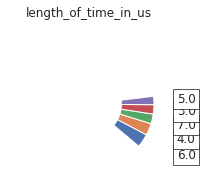

<Figure size 1200x480 with 0 Axes>

,14,frequency,acum_frec,rel_percent_frec
6.0,6.0,342,342,0.033612
4.0,4.0,298,640,0.029287
7.0,7.0,246,886,0.024177
3.0,3.0,234,1120,0.022998
5.0,5.0,210,1330,0.020639





Frecuencias de la columna "education_level__children_"


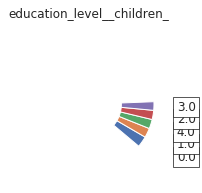

<Figure size 1200x480 with 0 Axes>

,15,frequency,acum_frec,rel_percent_frec
0.0,0.0,277,277,0.027224
1.0,1.0,237,514,0.023292
4.0,4.0,234,748,0.022998
2.0,2.0,231,979,0.022703
3.0,3.0,215,1194,0.021130





Frecuencias de la columna "education_level__20__years"


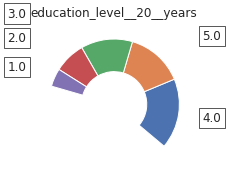

<Figure size 1200x480 with 0 Axes>

,16,frequency,acum_frec,rel_percent_frec
4.0,4.0,1770,1770,0.173956
5.0,5.0,1443,3213,0.141818
3.0,3.0,1303,4516,0.128059
2.0,2.0,791,5307,0.077740
1.0,1.0,455,5762,0.044717





Frecuencias de la columna "marital_status"


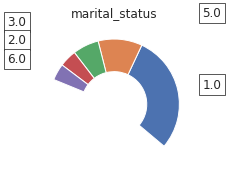

<Figure size 1200x480 with 0 Axes>

,17,frequency,acum_frec,rel_percent_frec
1.0,1.0,2965,2965,0.291400
5.0,5.0,1112,4077,0.109287
3.0,3.0,659,4736,0.064767
2.0,2.0,436,5172,0.042850
6.0,6.0,417,5589,0.040983





Frecuencias de la columna "pregnancy_status_at_exam"


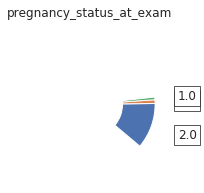

<Figure size 1200x480 with 0 Axes>

,18,frequency,acum_frec,rel_percent_frec
2.0,2.0,1150,1150,0.113022
3.0,3.0,94,1244,0.009238
1.0,1.0,65,1309,0.006388





Frecuencias de la columna "language_of_sp_interview"


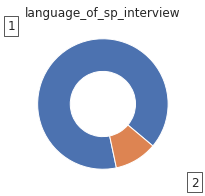

<Figure size 1200x480 with 0 Axes>

,19,frequency,acum_frec,rel_percent_frec
1,1,9100,9100,0.894349
2,2,1075,10175,0.105651





Frecuencias de la columna "total_number_of_people_in_"


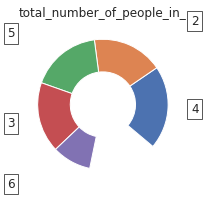

<Figure size 1200x480 with 0 Axes>

,20,frequency,acum_frec,rel_percent_frec
4,4,2100,2100,0.206388
2,2,1787,3887,0.175627
5,5,1781,5668,0.175037
3,3,1779,7447,0.174840
6,6,985,8432,0.096806





Frecuencias de la columna "annual_household_income"


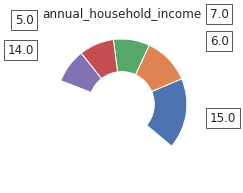

<Figure size 1200x480 with 0 Axes>

,21,frequency,acum_frec,rel_percent_frec
15.0,15.0,1781,1781,0.175037
6.0,6.0,1185,2966,0.116462
7.0,7.0,913,3879,0.089730
5.0,5.0,880,4759,0.086486
14.0,14.0,860,5619,0.084521


In [0]:
for i in range(len(dem.columns)):
  print('Frecuencias de la columna "{}"'.format(dem.columns[i]))

  frequency = dem.iloc[:,i].value_counts()
  acum_frec = frequency.cumsum()
  rel_percent_frec = frequency/dem.shape[0]
  df = pd.DataFrame({i: dem.iloc[:,i].value_counts().index.values,
                    'frequency': frequency,
                    'acum_frec': acum_frec,
                    'rel_percent_frec': rel_percent_frec
                    })
  donut_graph(rel_percent_frec.iloc[:5], dem.iloc[:,i].value_counts().index.values[:5],
              title=dem.columns[i])

  # display(dem.iloc[:,i].value_counts().index.values)
  display(df.head(5))
  print('\n\n')

## 3) Perfil Demográfico en Base a Nivel Educacional

Utilice el nivel educacional de los encuestados para generar un perfil demográfico de  las personas en base a dicha característica. Como mínimo el perfil debe considerar:

* Sexo.

* Edad.

* Estado civil.

* Raza

* Participación del entrevistado.

* Ciudadano de US.

* Cantidad de personas en el hogar.

* Ingreso anual del hogar. 


In [0]:
dem[dem.gender == 2].groupby(['education_level__children_']).count().sort_values('education_level__children_')

,respondent_sequence_number,data_release_cycle,interview_examination_stat,gender,age_in_years_at_screening,age_in_months_at_screening,race_hispanic_origin,race_hispanic_origin_w__nh,six_month_time_period,age_in_months_at_exam__0__,served_active_duty_in_us_a,served_in_a_foreign_countr,country_of_birth,citizenship_status,length_of_time_in_us,education_level__20__years,marital_status,pregnancy_status_at_exam,language_of_sp_interview,total_number_of_people_in_,annual_household_income
education_level__children_,,,,,,,,,,,,,,,,,,,,,
0.0,129,129,129,129,129,0,129,129,124,124,0,0,129,129,3,0,0,0,129,129,128
1.0,111,111,111,111,111,0,111,111,103,103,0,0,111,111,2,0,0,0,111,111,110
2.0,110,110,110,110,110,0,110,110,104,104,0,0,110,110,5,0,0,0,110,110,106
3.0,100,100,100,100,100,0,100,100,95,95,0,0,100,100,5,0,0,0,100,100,99
4.0,105,105,105,105,105,0,105,105,104,104,0,0,105,105,5,0,0,0,105,105,103
5.0,114,114,114,114,114,0,114,114,111,111,0,0,114,114,8,0,0,0,114,114,112
6.0,87,87,87,87,87,0,87,87,85,85,0,0,87,87,4,0,0,0,87,87,86
7.0,96,96,96,96,96,0,96,96,89,89,0,0,96,96,14,0,0,0,96,96,96
8.0,103,103,103,103,103,0,103,103,99,99,0,0,103,103,10,0,0,0,103,103,102


### Perfil Nivel Educacional - Sexo

respondent_sequence_number         ...          
education_level__children_                       0.0    1.0   ... 66.0 99.0
gender                                                        ...          
1                                               148.0  126.0  ...  5.0  1.0
2                                               129.0  111.0  ...  4.0  NaN

[2 rows x 19 columns]

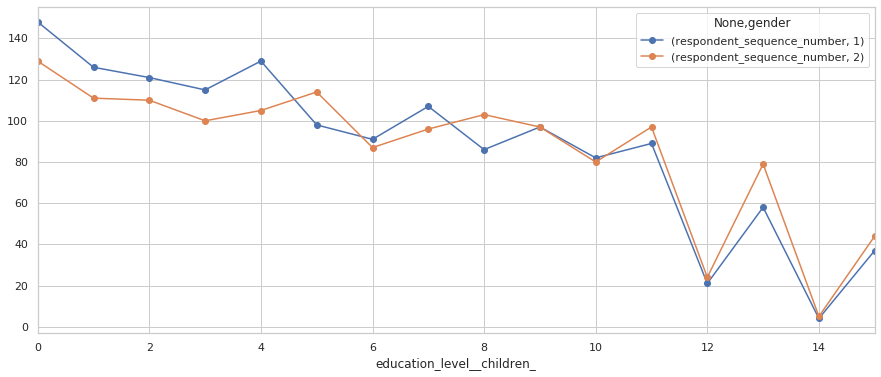

---



respondent_sequence_number         ...          
education_level__20__years                        1.0    2.0  ...  7.0  9.0
gender                                                        ...          
1                                               230.0  393.0  ...  NaN  3.0
2                                               225.0  398.0  ...  2.0  2.0

[2 rows x 7 columns]

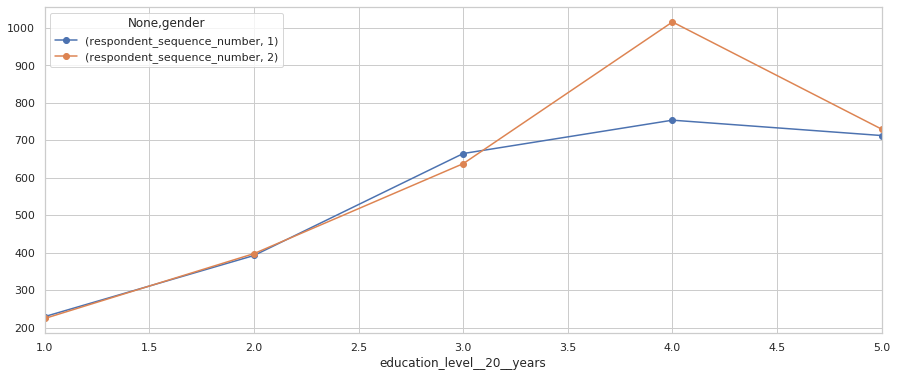

In [0]:
# Nivel educacional de los niños por sexo:

display(dem[['education_level__children_' , 'gender', 
             'respondent_sequence_number']]\
        .groupby(['education_level__children_', 'gender'])\
        .count().unstack('education_level__children_'))

dem[['education_level__children_' , 'gender', 'respondent_sequence_number']]\
    .groupby(['education_level__children_', 'gender'])\
    .count().unstack('gender')\
    .iloc[:16,:].plot(figsize=(15, 6), style='-o')

save_graph(modify_text('gender childrens educ'))
plt.show()
print('---\n')

# Nivel educacional de los adultos por sexo:

display(dem[['education_level__20__years' , 'gender', 
             'respondent_sequence_number']]\
        .groupby(['education_level__20__years', 'gender'])\
        .count().unstack('education_level__20__years'))

dem[['education_level__20__years' , 'gender', 'respondent_sequence_number']]\
    .groupby(['education_level__20__years', 'gender'])\
    .count().unstack('gender')\
    .iloc[:5,:].plot(figsize=(15, 6), style='-o')

save_graph(modify_text('gender adults educ'))
plt.show()


### Perfil Nivel Educacional - Edad

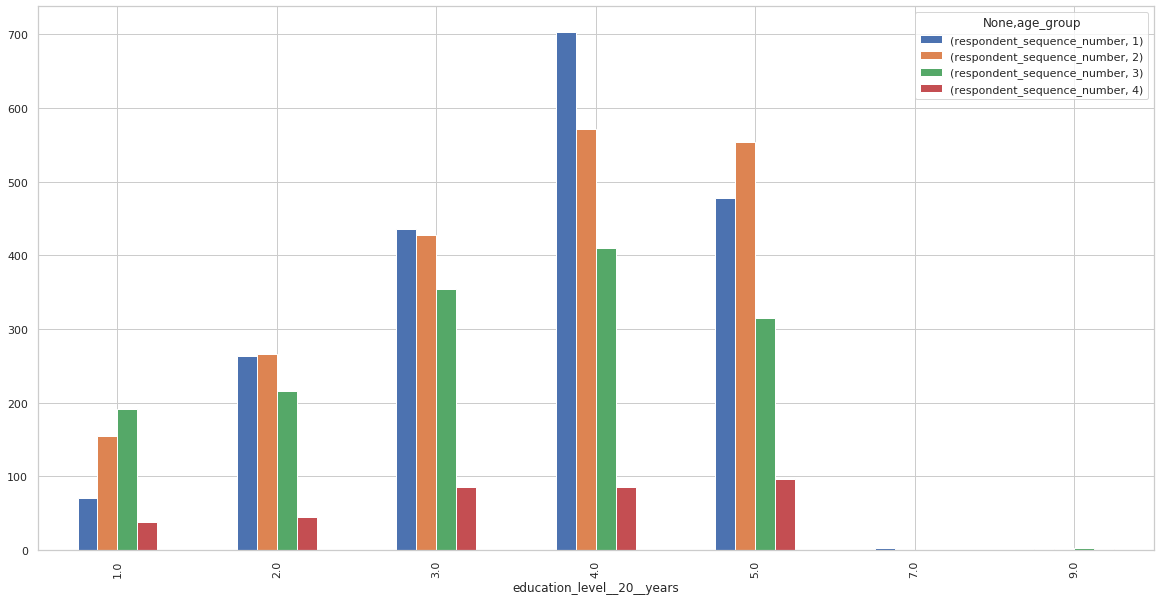

In [0]:
age_gender_dem_data = dem[['respondent_sequence_number', 
                           'education_level__20__years',
                           'education_level__children_' ,
                           'age_in_months_at_screening', 
                           'age_in_years_at_screening' ] ]
over20years = age_gender_dem_data[age_gender_dem_data\
                                  .age_in_years_at_screening >= 20]\
                                  .sort_values('age_in_years_at_screening')
# display(grouped_by_age)

# Cantidad de personas por edad a partir de los 20 años:
grouped_by_age = over20years.groupby('age_in_years_at_screening').count()
# plt.bar(grouped_by_age.index.values, grouped_by_age.respondent_sequence_number)

print()

over20years['age_group'] = (over20years.age_in_years_at_screening // 20)

# display(over20years.groupby(['age_group', 'age_in_years_at_screening']).count())
over20years[['age_group', 'education_level__20__years', 
             'respondent_sequence_number']]\
             .groupby(['age_group', 'education_level__20__years'])\
             .count().unstack('age_group').plot.bar(figsize=(20,10))

save_graph(modify_text('age education'))


### Perfil Nivel Educacional - Estado Civil

,,respondent_sequence_number
education_level__children_,marital_status,


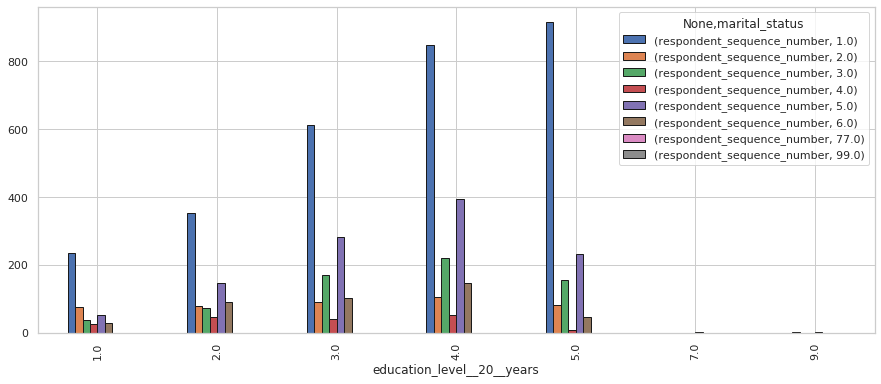

In [0]:
# Perfil Nivel Educacional - Estado Civil:
display(dem[['education_level__children_' , 'marital_status', 
             'respondent_sequence_number']]\
        .groupby(['education_level__children_', 'marital_status']).count())
dem[['education_level__20__years' , 'marital_status', 
     'respondent_sequence_number']]\
     .groupby(['education_level__20__years', 'marital_status']).count()\
     .unstack('marital_status').plot(kind='bar', figsize=(15, 6), 
      edgecolor='k')
     
save_graph(modify_text('marital status'))

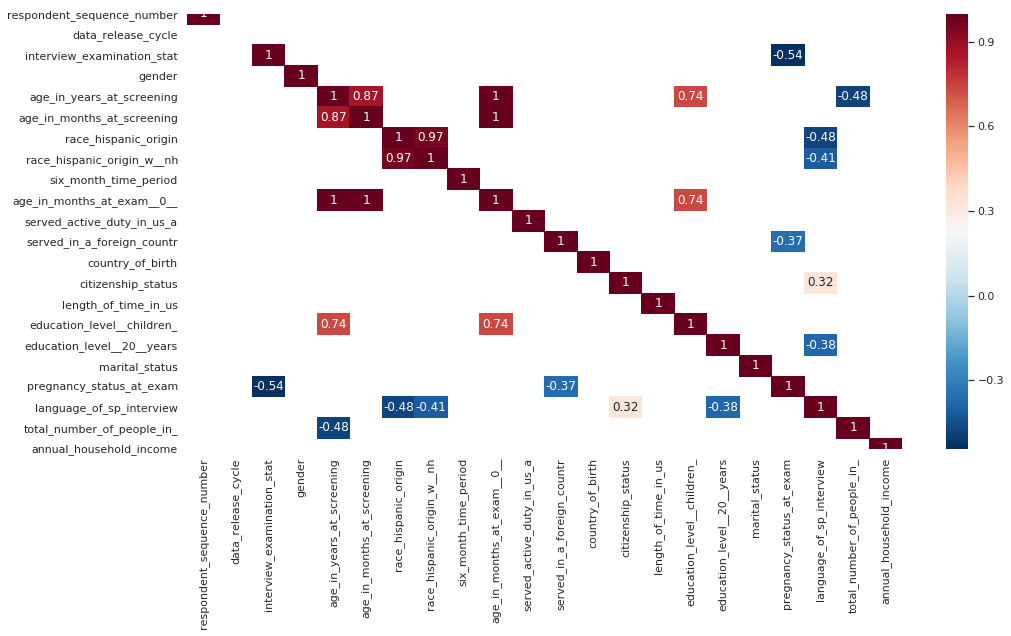

In [0]:
plt.figure(figsize=(16,8))
corr_mat = dem.corr()
corr_mat_graph = corr_mat[abs(corr_mat) >= 0.3]
sns.heatmap(corr_mat_graph, cmap="RdBu_r", annot=True)
save_graph(modify_text('heatmap demography'))

## 4) Estudie las distribuciones de frecuencia de: 
* Peso.('weight__kg_')
* Altura. ('standing_height__cm_')
* Índice de masa corporal. ('body_mass_index__kg_m__2_')
* Circunferencia de la cabeza. ('head_circumference__cm_')
* Presión sistólica. 
* Presión diastólica.
* Triglicéridos.
* Colesterol total. 
* Insulina.


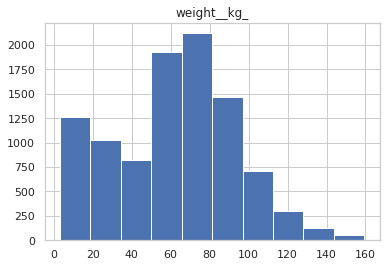

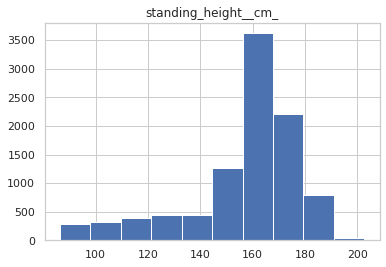

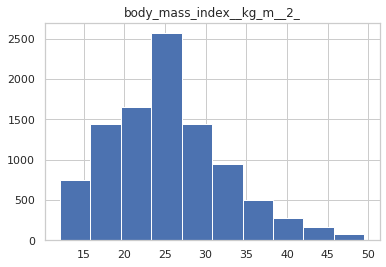

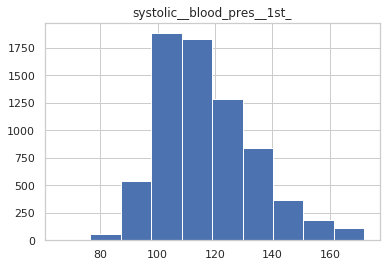

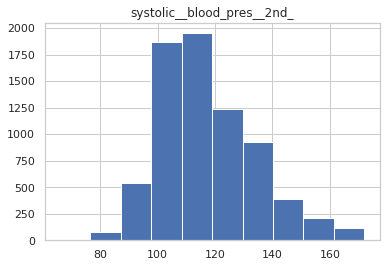

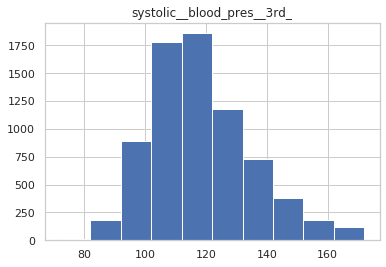

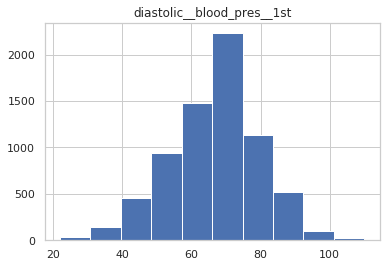

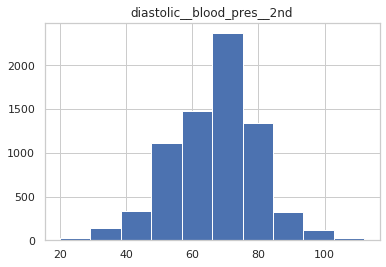

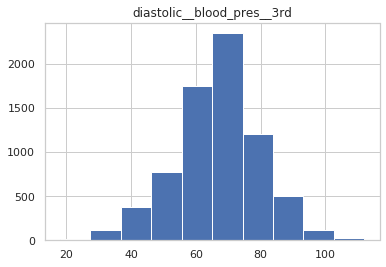

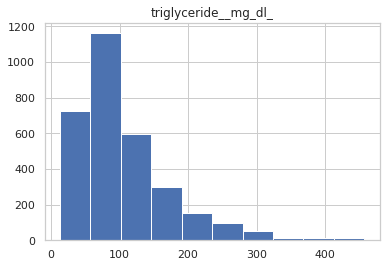

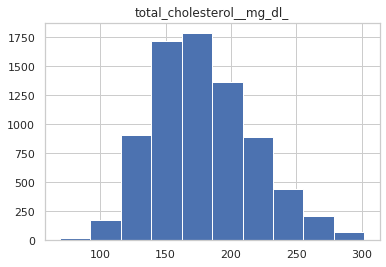

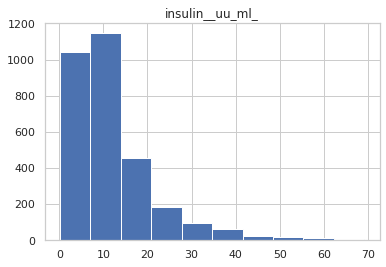

In [0]:
for col_name in ['weight__kg_', 'standing_height__cm_', 'body_mass_index__kg_m__2_']:
  bm[col_name].hist()
  plt.title(col_name)
  save_graph(modify_text('histogram'+col_name))
  plt.show()
  print()

bp_cols = ['systolic__blood_pres__1st_', 'systolic__blood_pres__2nd_', 'systolic__blood_pres__3rd_',
           'diastolic__blood_pres__1st', 'diastolic__blood_pres__2nd',  'diastolic__blood_pres__3rd']
for col_name in bp_cols:
  bp[col_name].hist()
  plt.title(col_name)
  save_graph(modify_text('_hist'+col_name))
  plt.show()
  print()

lab_cols = ['triglyceride__mg_dl_', 'total_cholesterol__mg_dl_', 'insulin__uu_ml_']
for col_name in lab_cols:
  lab_res[col_name].hist()
  plt.title(col_name)
  save_graph(modify_text('histogram'+col_name))
  plt.show()
  print()

## 5) Identificar Correlaciones con las Presiones
Identifique cuales son las características que más influyen en que una persona tenga presión alta o baja. Compruebe lo anterior mediante una matriz de correlación. Realice el análisis tanto para la presión sistólica como diastólica. 


### Presión - Presión

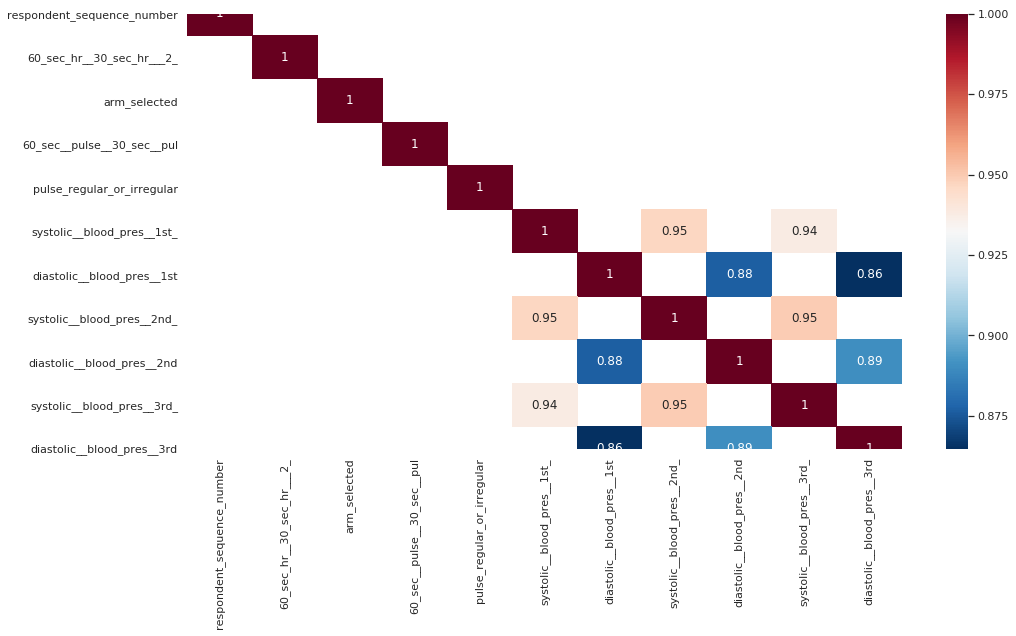

In [0]:
plt.figure(figsize=(16,8))
corr_mat = bp.corr()
corr_mat_graph = corr_mat[abs(corr_mat) >= 0.5]
sns.heatmap(corr_mat_graph, cmap="RdBu_r", annot=True)
save_graph(modify_text('corr_pres_pres'))

In [0]:
# Se genera una coluna con los promedios de las 3 columnas con mediciones de la
# presión sistólica:

list_sis_pres = ['systolic__blood_pres__1st_', 'systolic__blood_pres__2nd_', 
'systolic__blood_pres__3rd_']
sum_sis_pres = None
for col_name in list_sis_pres:
  if isinstance(sum_sis_pres, pd.DataFrame):
    sum_sis_pres += bp[col_name]
  else:
    sum_sis_pres = bp[col_name]

mean_sis_pres = sum_sis_pres / 3

# Se genera una coluna con los promedios de las 3 columnas con mediciones de la
# presión diastólica:

list_dias_pres = ['diastolic__blood_pres__1st', 'diastolic__blood_pres__2nd', 
'diastolic__blood_pres__3rd']
sum_dias_pres = None
for col_name in list_dias_pres:
  if isinstance(sum_dias_pres, pd.DataFrame):
    sum_dias_pres += bp[col_name]
  else:
    sum_dias_pres = bp[col_name]

mean_dias_pres = sum_dias_pres / 3

# Se crea un dataframe con las nuevas columnas con los premedios de las 
# presiones:

mean_preasures = pd.DataFrame({'respondent_sequence_number': bp.respondent_sequence_number.values,
              'mean_sis_pres': mean_sis_pres,
              'mean_dias_pres': mean_dias_pres})


In [0]:
# Eliminiación de valores nulos de presión:
initial_count = mean_preasures.shape[0]

mean_preasures.dropna(axis='index', inplace=True)
print(f'La base de datos ahora tiene {mean_preasures.shape[0]} filas y {mean_preasures.shape[1]} columnas.')
print(f'Se eliminaron {initial_count - mean_preasures.shape[0]} filas')

La base de datos ahora tiene 7150 filas y 3 columnas.
Se eliminaron 2663 filas


In [0]:
def correlation_map(dataframe):
  corr_pd = dataframe.corr()
  # Se filtran los valores, dejando solo los con una correlación mayor al 50%
  corr_pd = corr_pd[abs(corr_pd) >= 0.5]

  plt.figure(figsize=(16,8))
  mask = np.zeros_like(corr_pd, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  sns.heatmap(corr_pd,annot=True,
              mask=mask, cmap='RdBu_r');

### Presión - Demografía

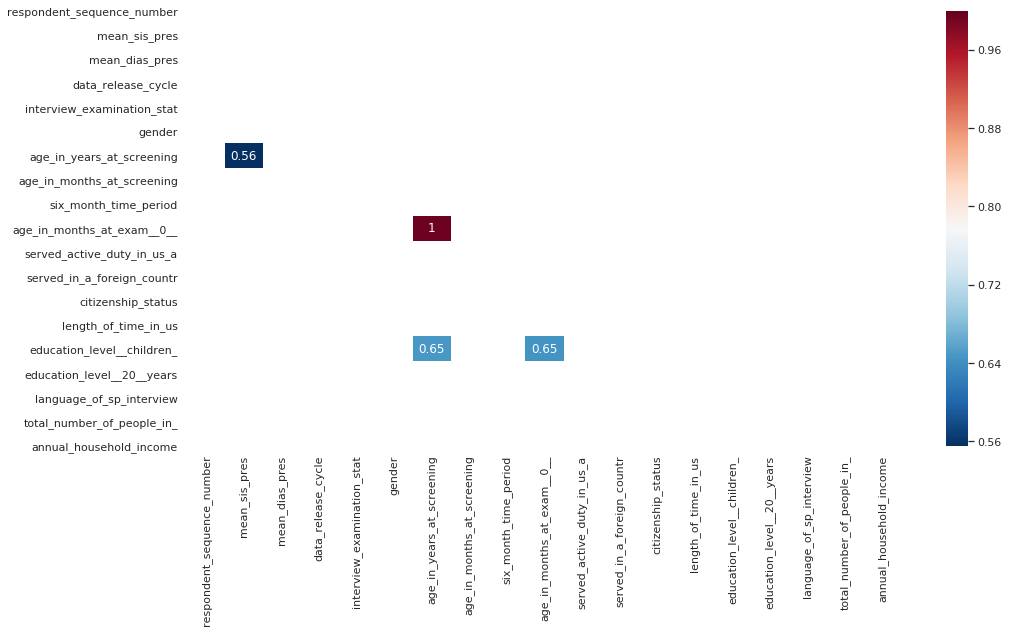

In [0]:
util_dem_cols = ['Respondent sequence number',  #CAT_ORD
                      'Data release cycle',     #CAT_ORD
                      'Interview/Examination status', #CAT_DIC
                      'Gender', #CAT_DIC
                      'Age in years at screening', #NUM_DIS
                      'Age in months at screening (for childs under 2 years old)', #NUM_DIS
                      'Six month time period', #CAT_ORD
                      'Age in months at exam (0 - 19 years)', #NUM_DIS
                      'Served active duty in US Armed Forces', #CAT_DIC
                      'Served in a foreign country', #CAT_DIC
                      'Citizenship status', #CAT_DIC
                      'Length of time in US', #CAT_ORD
                      'Education level (Children/Youth 6-19)', #CAT_ORD
                      'Education level (20+ years)', #CAT_ORD
                      'Language of SP Interview', #CAT_DIC
                      'Total number of people in the Household', #NUM_DIS
                      'Annual household income' #CAT_ORD
                      ]

preasures_dem = mean_preasures.merge(dem[list(map(modify_text, util_dem_cols))])

correlation_map(preasures_dem)
save_graph(modify_text('corr pres dem'))



### Presión - Medidas del Cuerpo


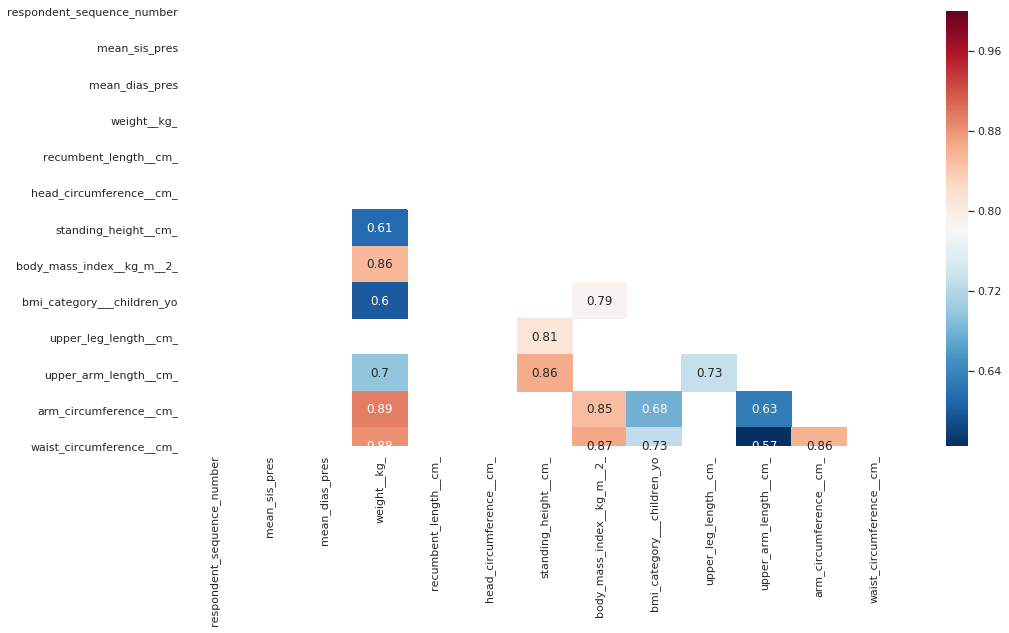

In [0]:
util_bm_cols = ['Respondent sequence number', #NUM_DIS
                     'Weight (kg)', #NUM_CON
                     'Recumbent Length (cm)', #NUM_CON
                     'Head Circumference (cm)', #NUM_CON
                     'Standing Height (cm)', #NUM_CON
                     'Body Mass Index (kg/m**2)', #NUM_CON
                     'BMI Category - Children/Youth', #CAT_ORD
                     'Upper Leg Length (cm)', #NUM_CON
                     'Upper Arm Length (cm)', #NUM_CON
                     'Arm Circumference (cm)',#NUM_CON 
                     'Waist Circumference (cm)', #NUM_CON
                     ]

preasures_bm = mean_preasures.merge(bm[list(map(modify_text, util_bm_cols))])
correlation_map(preasures_bm)
save_graph(modify_text('corr_pres bm'))

### Presión - Resultados de Laboratorio

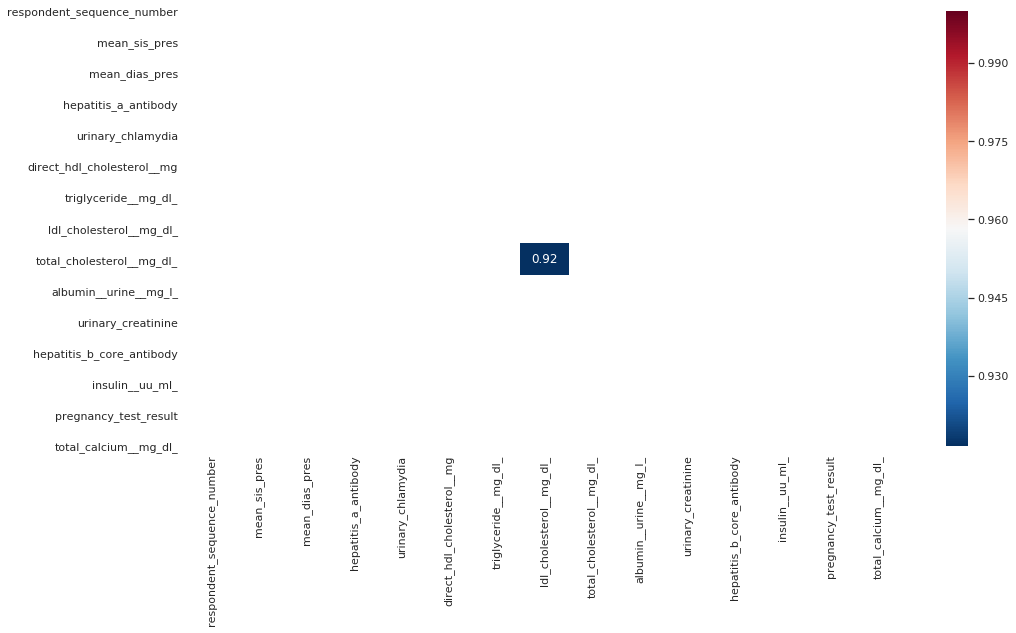

In [0]:
preasures_lab = mean_preasures.merge(lab_res[list(map(modify_text, readable_lab_names))])
correlation_map(preasures_lab)
save_graph(modify_text('corr_pres lab'))

## 6) Análisis Estadístico de Medidas de Tendencia Central y Medidas de Dispersión de las Pruebas de Laboratorio 

In [0]:
def descriptive_measures(column):
  dm = {'median' : [column.median(), '#E69201'],
       'mode' : [column.mode().to_list()],
       'mean' : [column.mean(), 'r']}

  dm2={'std_desv' : column.std(),
      'variance' : column.var()}

  print(f'MEDIDAS DE TENDENCIA CENTRAL:\n\tMedia Aritmética: {dm["mean"][0]}\n\t'\
        f'Moda: {dm["mode"][0]}\n\tMediana: {dm["median"][0]}\n\nMEDIDAS DE DISPERSIÓN\n\t'\
        f'Desviación Estándar: {dm2["std_desv"]}\n\tVarianza: {dm2["variance"]}'\
        '\n\nEn el gráfico la media es roja y la mediana naranja\n')
  
  return dm

In [0]:
def graph_dm(data, col_name, dic):  
  data[col_name].hist()
  plt.title(col_name)
  
  for measure in list(dic.keys())[0:3:2]:
    plt.axvline(x=dic[measure][0], linewidth=4, color=dic[measure][1])
  plt.show()



----------
Trabajando con: hepatitis_a_antibody

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 1.417836398838335
	Moda: [1.0]
	Mediana: 1.0

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 0.49323278581314967
	Varianza: 0.2432785810010004

En el gráfico la media es roja y la mediana naranja



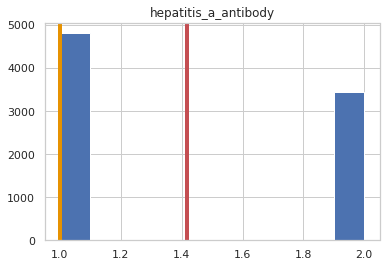



----------
Trabajando con: urinary_chlamydia

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 1.9728610855565778
	Moda: [2.0]
	Mediana: 2.0

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 0.1625255179055669
	Varianza: 0.026414543970472753

En el gráfico la media es roja y la mediana naranja



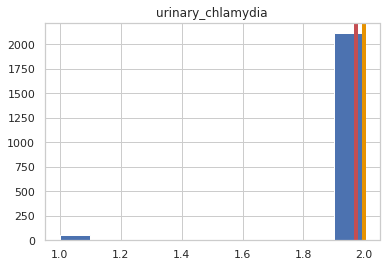



----------
Trabajando con: direct_hdl_cholesterol__mg

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 52.483302411873844
	Moda: [48.0]
	Mediana: 51.0

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 13.93388913935726
	Varianza: 194.1532665478982

En el gráfico la media es roja y la mediana naranja



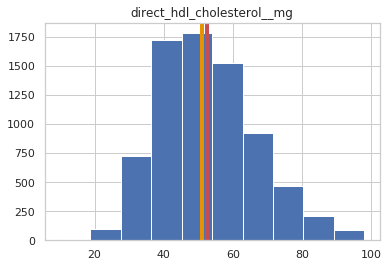



----------
Trabajando con: triglyceride__mg_dl_

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 106.34732457545658
	Moda: [56.0]
	Mediana: 88.0

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 67.68032773909904
	Varianza: 4580.626762871859

En el gráfico la media es roja y la mediana naranja



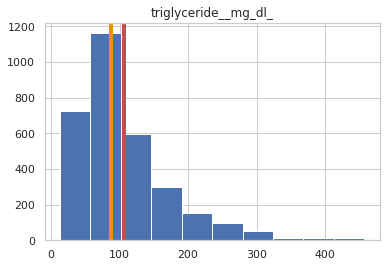



----------
Trabajando con: ldl_cholesterol__mg_dl_

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 105.2148653034729
	Moda: [92.0]
	Mediana: 103.0

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 33.00925568335621
	Varianza: 1089.610960769184

En el gráfico la media es roja y la mediana naranja



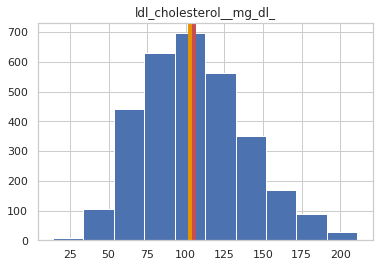



----------
Trabajando con: total_cholesterol__mg_dl_

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 178.53153034300792
	Moda: [160.0]
	Mediana: 175.0

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 38.26562095360565
	Varianza: 1464.2577469650234

En el gráfico la media es roja y la mediana naranja



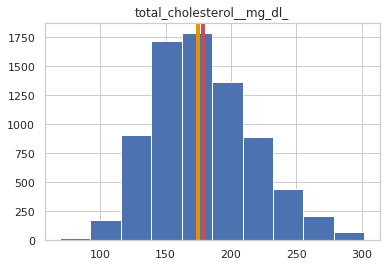



----------
Trabajando con: albumin__urine__mg_l_

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 23.06198545089673
	Moda: [4.2]
	Mediana: 8.4

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 59.41127614223341
	Varianza: 3529.6997328487128

En el gráfico la media es roja y la mediana naranja



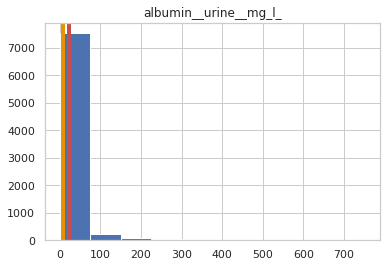



----------
Trabajando con: urinary_creatinine

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 123.78275602409639
	Moda: [103.0]
	Mediana: 111.0

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 74.98619998645752
	Varianza: 5622.930188409001

En el gráfico la media es roja y la mediana naranja



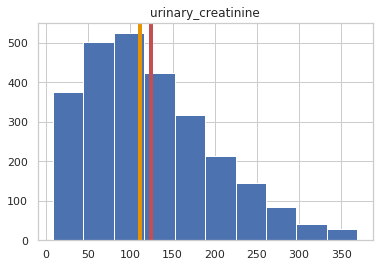



----------
Trabajando con: hepatitis_b_core_antibody

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 1.9429205851619644
	Moda: [2.0]
	Mediana: 2.0

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 0.23200945264301456
	Varianza: 0.05382838611571122

En el gráfico la media es roja y la mediana naranja



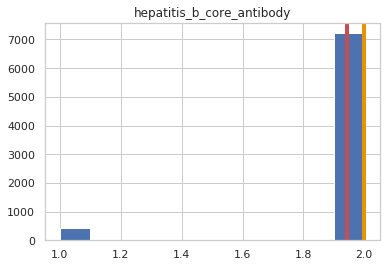



----------
Trabajando con: insulin__uu_ml_

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 12.174867256637196
	Moda: [6.61]
	Mediana: 9.32

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 9.611046547835908
	Varianza: 92.37221574466852

En el gráfico la media es roja y la mediana naranja



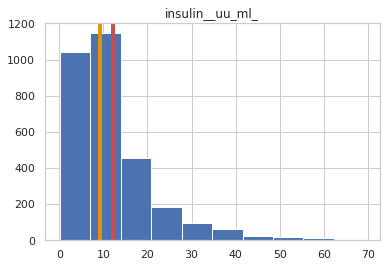



----------
Trabajando con: pregnancy_test_result

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 1.9690721649484537
	Moda: [2.0]
	Mediana: 2.0

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 0.2516513941013776
	Varianza: 0.06332842415316686

En el gráfico la media es roja y la mediana naranja



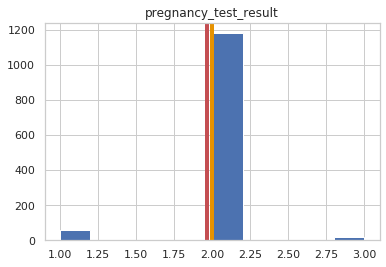



----------
Trabajando con: total_calcium__mg_dl_

MEDIDAS DE TENDENCIA CENTRAL:
	Media Aritmética: 9.480315691736307
	Moda: [9.4]
	Mediana: 9.5

MEDIDAS DE DISPERSIÓN
	Desviación Estándar: 0.34292462744256486
	Varianza: 0.11759730010662191

En el gráfico la media es roja y la mediana naranja



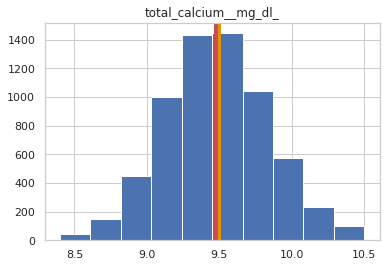

In [0]:
for col_name in lab_res.iloc[:, 1:].columns:
  print(f'\n\n----------\nTrabajando con: {col_name}\n')
  graph_dm(lab_res, col_name, descriptive_measures(lab_res[col_name]))

## 7) Filtrar por Sexo a Menores de 2 Años y Establecer Características Diferenciadoras

Realice un filtro por sexo para niños menores de 2 años e indique aquellas características que permiten diferenciar de mejor manera a que sexo corresponde. Estudie la correlación y covarianza entre dichas características.

In [0]:
babies = dem[['respondent_sequence_number', 'gender', 'age_in_months_at_screening']]
print(babies.shape)
babies.dropna(axis='index', inplace=True)
print(babies.shape)
babies.groupby(['gender', 'age_in_months_at_screening']).count().unstack('gender')

(10175, 3)
(673, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


respondent_sequence_number    
gender                                              1   2
age_in_months_at_screening                               
0.0                                                16  12
1.0                                                20  22
2.0                                                11  15
3.0                                                11  17
4.0                                                18  15
5.0                                                12  26
6.0                                                27  17
7.0                                                20  12
8.0                                                22  17
9.0                                                19  25
10.0                                               18  13
11.0                                                7  13
12.0                                                8  12
13.0                                               17  10
14.0                                                7   9
15.0                                               22   7
16.0                                               10  11
17.0                                               14  10
18.0                                               16   9
19.0                                                6   6
20.0                                                9   9
21.0                                               11   5
22.0                                               17   5
23.0                                               11  19
24.0                                                3   5

### Bebés - Medidas del Cuerpo

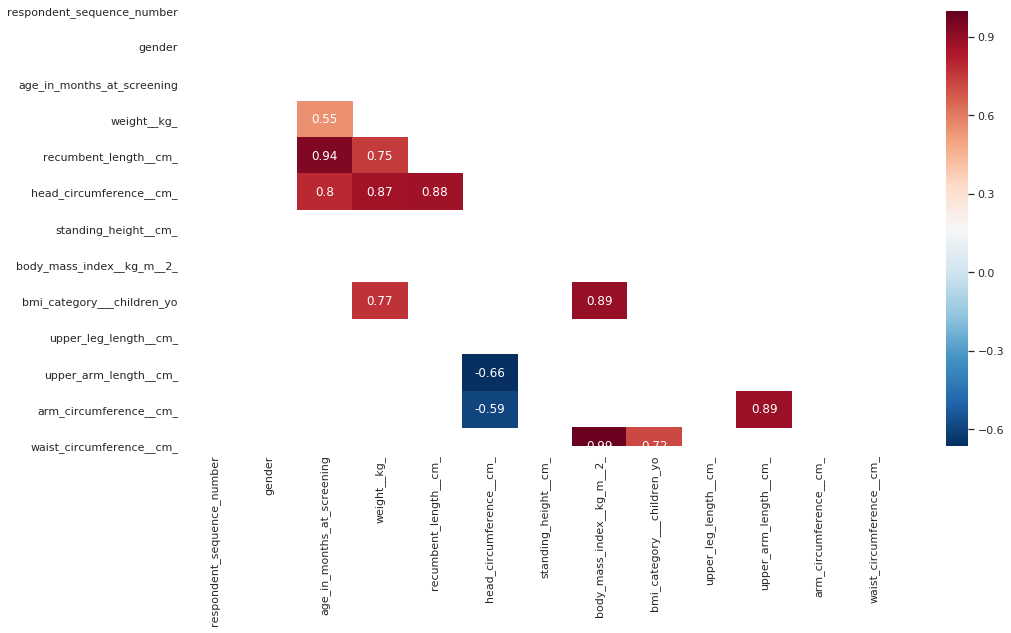

In [0]:
babies_bm = babies.merge(bm[list(map(modify_text, util_bm_cols))])
correlation_map(babies_bm)
save_graph(modify_text('corr_baby mesure'))


### Bebés - Resultados de Laboratorio



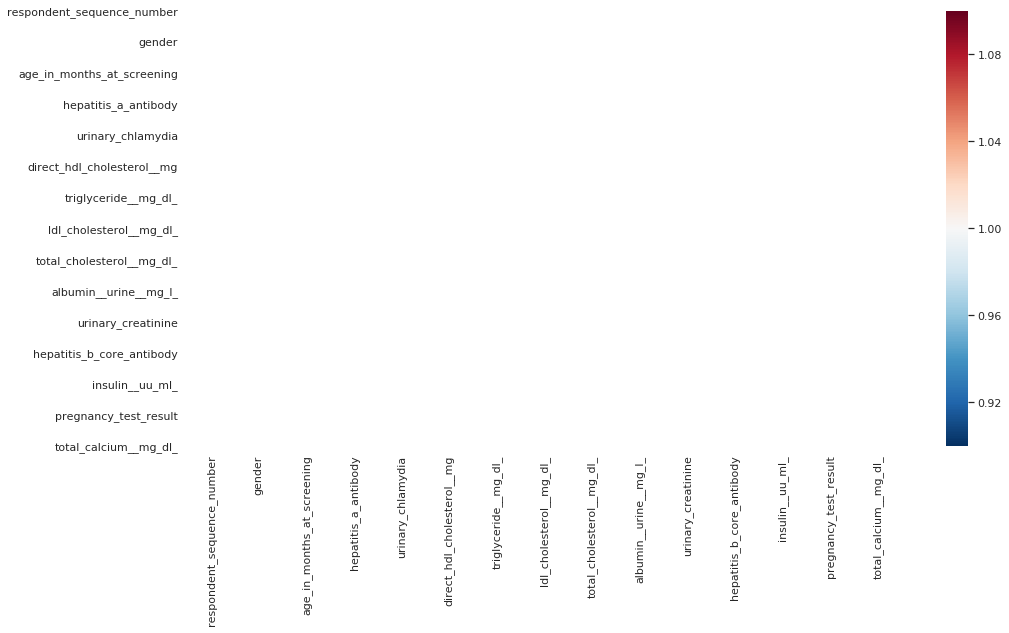

In [0]:
babies_lab = babies.merge(lab_res[list(map(modify_text, readable_lab_names))])
correlation_map(babies_lab)

### Bebés - Datos Demográficos


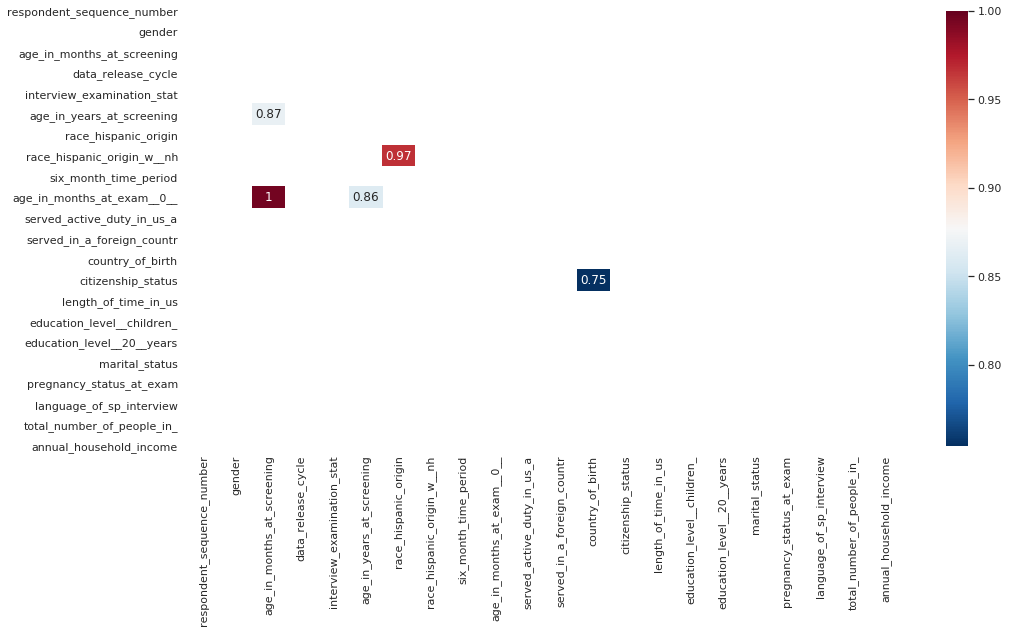

In [0]:
babies_dem = babies.merge(dem[list(map(modify_text, readable_col_names))])
correlation_map(babies_dem)

### Bebés - Presión Sanguínea

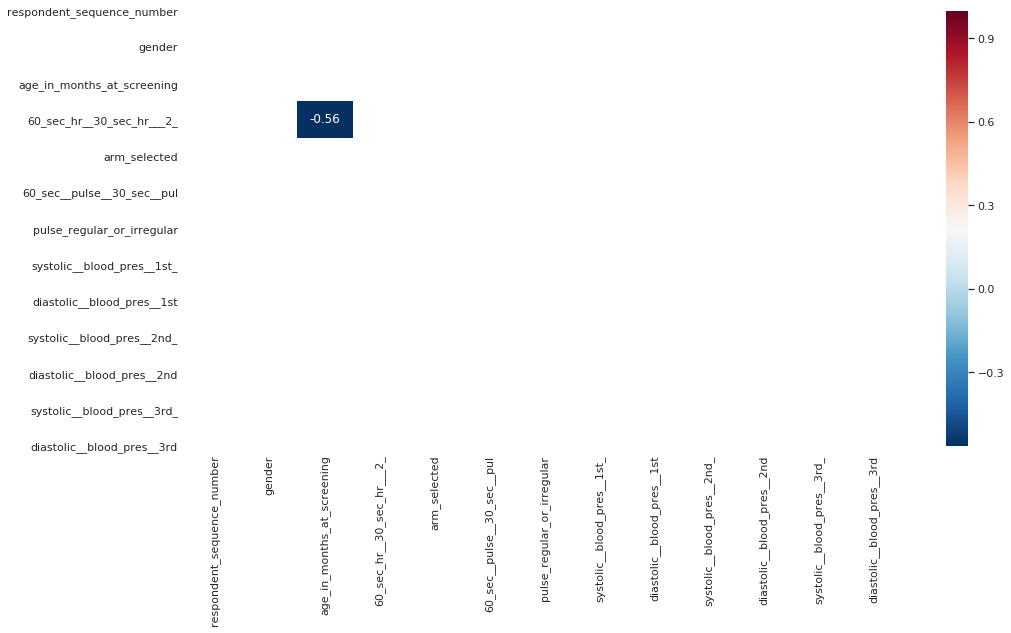

In [0]:
babies_bp = babies.merge(bp[list(map(modify_text, readable_bp_names))])
correlation_map(babies_bp)

## 8) Probabilidades de Padecer Enfermedades en Base a Perfil Educacional
En base al perfil demográfico realizado en (3), calcule la probabilidad que una persona perteneciente a cada una de dichas agrupaciones padezca:

* Hepatitis A.

* Hepatitis B.

* Clamidia.


### Hepatitis A

In [0]:
# Se seleccinan todos los jóvenes usando la clasificación de nivel educativo:
young_hepatitisa_total = dem[['respondent_sequence_number', 'education_level__children_']]\
    .dropna(axis='index')\
    .merge(lab_res[['respondent_sequence_number','hepatitis_a_antibody']])# Se combina con la tabla de resutados de laboratorio:

# Limpieza de nulos:
young_hepatitisa_total = young_hepatitisa_total[young_hepatitisa_total.hepatitis_a_antibody.notnull()]

# Se seleccionan los jóvenes con Hepatitis A:
young_hepatitisa_positive = young_hepatitisa_total[young_hepatitisa_total.hepatitis_a_antibody == 1]

# Se calcula la prbabilidad y se muestra:
yha_per_probability = (count(young_hepatitisa_positive) / count(young_hepatitisa_total)) * 100
print('Probabilidad de que un joven tenga Hepatitis A: {} %'.format(round(yha_per_probability)))

Probabilidad de que un joven tenga Hepatitis A: 78.0 %


In [0]:
# Se seleccinan todos los adultos usando la clasificación de nivel educativo:
adult_hepatitisa_total = dem[['respondent_sequence_number', 'education_level__20__years']]\
    .dropna(axis='index')\
    .merge(lab_res[['respondent_sequence_number','hepatitis_a_antibody']])# Se combina con la tabla de resutados de laboratorio:

# Limpieza de nulos:
adult_hepatitisa_total = adult_hepatitisa_total[adult_hepatitisa_total.hepatitis_a_antibody.notnull()]

# Se seleccionan los adultos con Hepatitis A:
adult_hepatitisa_positive = adult_hepatitisa_total[adult_hepatitisa_total.hepatitis_a_antibody == 1]

# Se calcula la prbabilidad y se muestra:
aha_per_probability = (count(adult_hepatitisa_positive) / count(adult_hepatitisa_total)) * 100
print('Probabilidad de que un adulto tenga Hepatitis A: {} %'.format(round(aha_per_probability)))

Probabilidad de que un adulto tenga Hepatitis A: 46.0 %


### Hepatitis B

In [0]:
# Se seleccinan todos los jóvenes usando la clasificación de nivel educativo:
young_hepatitisb_total = dem[['respondent_sequence_number', 'education_level__children_']]\
    .dropna(axis='index')\
    .merge(lab_res[['respondent_sequence_number','hepatitis_b_core_antibody']])# Se combina con la tabla de resutados de laboratorio:

# Limpieza de nulos:
young_hepatitisb_total = young_hepatitisb_total[young_hepatitisb_total.hepatitis_b_core_antibody.notnull()]

# Se seleccionan los jóvenes con Hepatitis B:
young_hepatitisb_positive = young_hepatitisb_total[young_hepatitisb_total.hepatitis_b_core_antibody == 1]

# Se calcula la prbabilidad y se muestra:
yhb_per_probability = (count(young_hepatitisb_positive) / count(young_hepatitisb_total)) * 100
print('Probabilidad de que un joven tenga Hepatitis B: {} %'.format(round(yhb_per_probability)))

Probabilidad de que un joven tenga Hepatitis B: 0.0 %


In [0]:
# Se seleccinan todos los adultos usando la clasificación de nivel educativo:
adult_hepatitisb_total = dem[['respondent_sequence_number', 'education_level__20__years']]\
    .dropna(axis='index')\
    .merge(lab_res[['respondent_sequence_number','hepatitis_b_core_antibody']])# Se combina con la tabla de resutados de laboratorio:

# Limpieza de nulos:
adult_hepatitisb_total = adult_hepatitisb_total[adult_hepatitisb_total.hepatitis_b_core_antibody.notnull()]

# Se seleccionan los adultos con Hepatitis B:
adult_hepatitisb_positive = adult_hepatitisb_total[adult_hepatitisb_total.hepatitis_b_core_antibody == 1]

# Se calcula la prbabilidad y se muestra:
ahb_per_probability = (count(adult_hepatitisb_positive) / count(adult_hepatitisb_total)) * 100
print('Probabilidad de que un adulto tenga Hepatitis B: {} %'.format(round(ahb_per_probability)))

Probabilidad de que un adulto tenga Hepatitis B: 8.0 %


### Clamidia

In [0]:
# Total de jóvenes:
young_clamidia_total = dem[['respondent_sequence_number', 'education_level__children_']]\
    .dropna(axis='index')\
    .merge(lab_res[['respondent_sequence_number','urinary_chlamydia']])

# Jóvenes con Clamidia:
young_clamidia_positive = young_clamidia_total[young_clamidia_total.urinary_chlamydia == 1]

# Se calcula la probabilidad y se muestra:
yc_per_probability = (count(young_clamidia_positive) / count(young_clamidia_total)) * 100
print('La probabilidad de alguien con estudios, entre 18 y 19 años, tenga Clamidia es:')
print(str(round(yc_per_probability, 3)) + ' %')

La probabilidad de alguien con estudios, entre 18 y 19 años, tenga Clamidia es:
0.666 %


In [0]:
# Total de adultos:
adult_clamidia_total = dem[['respondent_sequence_number', 'education_level__20__years']]\
    .dropna(axis='index')\
    .merge(lab_res[['respondent_sequence_number','urinary_chlamydia']])

# Adultos con Clamidia:
adult_clamidia_positive = adult_clamidia_total[adult_clamidia_total.urinary_chlamydia == 1]

# Se calcula la probabilidad y se muestra:
ac_per_probability = (count(adult_clamidia_positive) / count(adult_clamidia_total)) * 100
print('La probabilidad de alguien con estudios, entre 20 y 39 años, tenga Clamidia es:')
print(str(round(ac_per_probability, 3)) + ' %')

La probabilidad de alguien con estudios, entre 20 y 39 años, tenga Clamidia es:
0.734 %


## 9) Caracterización de Mujeres Embarazadas

Realice un filtro para aquellas mujeres en estado de embarazo al momento de la encuesta y determine las principales características fisicas y fisiologicas que poseen. 


In [0]:
# Identificación de las mujeres embarazadas.
pregnant = lab_res[['respondent_sequence_number', 'pregnancy_test_result']]\
[lab_res.pregnancy_test_result == 1]

# Identificación de las mujeres NO embarazadas.
not_pregnant = lab_res[['respondent_sequence_number', 'pregnancy_test_result']]\
[lab_res.pregnancy_test_result == 2]

In [0]:
# Características fisicas :
preg_mes = pregnant.merge(bm).iloc[:,1:].describe().reset_index(inplace=False)
nopreg_mes = not_pregnant.merge(bm).iloc[:,1:].describe().reset_index(inplace=False)

display(preg_mes)
display(nopreg_mes)

needed_indexes = ['min', '25%', '50%', '75%', 'max', 'mean']
pd.concat([preg_mes, nopreg_mes]).groupby(['index', 'pregnancy_test_result'])\
.sum().iloc[:,1:].loc[needed_indexes, :].unstack('pregnancy_test_result')


,index,pregnancy_test_result,body_measures_component_st,weight__kg_,recumbent_length__cm_,head_circumference__cm_,standing_height__cm_,body_mass_index__kg_m__2_,bmi_category___children_yo,upper_leg_length__cm_,upper_arm_length__cm_,arm_circumference__cm_,waist_circumference__cm_
0,count,60.0,60.000000,60.000000,0.0,0.0,60.000000,60.000000,0.0,55.000000,60.000000,60.00000,60.000000
1,mean,1.0,2.916667,76.605000,NaN,NaN,162.523333,28.577813,NaN,38.329091,35.440253,30.53311,99.025685
2,std,0.0,0.278718,19.443786,NaN,NaN,6.954949,6.496053,NaN,2.747232,1.834894,4.42324,15.610402
3,min,1.0,2.000000,46.700000,NaN,NaN,145.100000,18.500000,NaN,31.200000,31.000000,22.60000,67.100000
4,25%,1.0,3.000000,64.250000,NaN,NaN,157.800000,23.875000,NaN,36.600000,34.475000,27.82500,91.350000
5,50%,1.0,3.000000,75.400000,NaN,NaN,162.650000,27.550000,NaN,38.600000,35.250000,30.15000,97.350000
6,75%,1.0,3.000000,86.400000,NaN,NaN,167.800000,31.675000,NaN,40.500000,36.600000,33.72500,106.725000
7,max,1.0,3.000000,140.600000,NaN,NaN,176.500000,47.700000,NaN,42.800000,40.000000,41.70000,145.200000


,index,pregnancy_test_result,body_measures_component_st,weight__kg_,recumbent_length__cm_,head_circumference__cm_,standing_height__cm_,body_mass_index__kg_m__2_,bmi_category___children_yo,upper_leg_length__cm_,upper_arm_length__cm_,arm_circumference__cm_,waist_circumference__cm_
0,count,1180.0,1180.000000,1180.000000,0.0,0.0,1180.000000,1180.000000,0.0,1140.000000,1180.000000,1180.000000,1180.000000
1,mean,2.0,1.122034,75.841487,NaN,NaN,161.752892,28.417495,NaN,37.936842,35.763865,32.129611,94.576989
2,std,0.0,0.468179,21.664937,NaN,NaN,6.925568,6.883124,NaN,2.956719,2.371749,5.629159,17.087696
3,min,2.0,1.000000,37.600000,NaN,NaN,142.500000,16.100000,NaN,27.200000,28.600000,20.500000,61.300000
4,25%,2.0,1.000000,59.975000,NaN,NaN,157.200000,23.000000,NaN,36.200000,34.200000,28.000000,81.875000
5,50%,2.0,1.000000,71.150000,NaN,NaN,162.000000,27.100000,NaN,38.000000,35.500000,31.200000,92.088226
6,75%,2.0,1.000000,87.700000,NaN,NaN,166.200000,32.500000,NaN,40.000000,37.200000,35.500000,104.925000
7,max,2.0,4.000000,159.000000,NaN,NaN,185.700000,49.500000,NaN,48.900000,46.000000,52.000000,153.000000


weight__kg_  ... waist_circumference__cm_
pregnancy_test_result         1.0  ...                      2.0
index                              ...                         
25%                        64.250  ...                81.875000
50%                        75.400  ...                92.088226
75%                        86.400  ...               104.925000
max                       140.600  ...               153.000000
mean                       76.605  ...                94.576989
min                        46.700  ...                61.300000

[6 rows x 20 columns]

Respecto al peso, el valor mínimo y de los primeros 2 cuartiles es menor que el de aquellas mujeres no embarazadas. Pero, los dos últimos cuartiles, y por lo tanto el valor máximo es mayor en aquellas mujeres que no están embarazadas. Esto se debe a los altos índices de obesidad que hay en estados unidos\*.

No hay variaciones significativas en la altura.

No hay diferencias significativas en el IMC. Salvo en el máximo (por outliers)





## 10) Estudio de Relaciones Entre Variables

Estudie la relación existente entre el peso y la altura, colesterol e insulina, edad y presión arterial. Realice gráficos de dispersión para visualizar la relación. Aplique un logaritmo a los datos y analice los cambios observados. Complemente lo anterior con el cálculo de correlación entre variables. 


In [0]:
# Se arma los DataFrame con lo necesario:
weight_height = bm[['respondent_sequence_number', 'weight__kg_', 
                   'standing_height__cm_']]
chol_insul = lab_res[['respondent_sequence_number', 'total_cholesterol__mg_dl_', 
                     'insulin__uu_ml_']]
age_bp = dem[['respondent_sequence_number', 'age_in_years_at_screening']].merge(mean_preasures)

# Se eliminan los valores nulos:
weight_height = weight_height[weight_height.notnull()]
chol_insul = chol_insul[chol_insul.notnull()]
age_bp = age_bp[age_bp.notnull()]

# Se guardan los DataFrames en una lista:
relations_dfs = [weight_height, chol_insul, age_bp]

Gráfico de dispersión de "weight__kg_" y "standing_height__cm_"



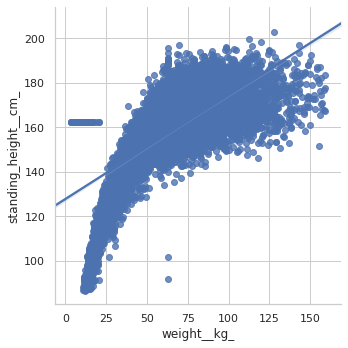


Gráfico de dispersión con el logarítmo aplicado de "weight__kg_" y "standing_height__cm_"



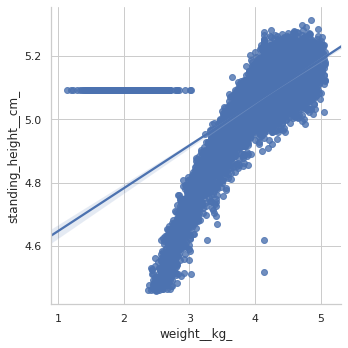


La correlación entre ambas variables es 0.6671365104894914


____________________________________________________________________________________________________


Gráfico de dispersión de "total_cholesterol__mg_dl_" y "insulin__uu_ml_"



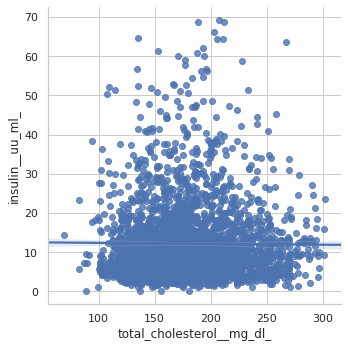


Gráfico de dispersión con el logarítmo aplicado de "total_cholesterol__mg_dl_" y "insulin__uu_ml_"



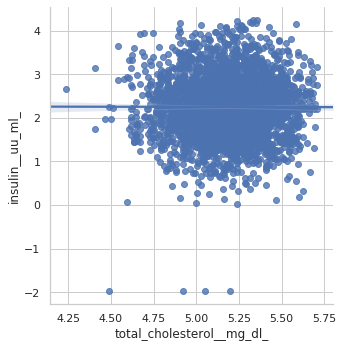


La correlación entre ambas variables es -0.009489619077772838


____________________________________________________________________________________________________


Gráfico de dispersión de "age_in_years_at_screening" y "mean_sis_pres"



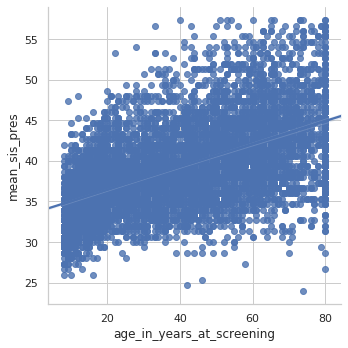


Gráfico de dispersión con el logarítmo aplicado de "age_in_years_at_screening" y "mean_sis_pres"



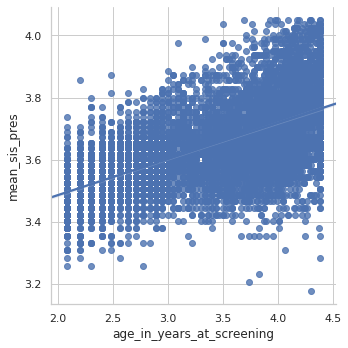


La correlación entre ambas variables es 0.5556343838497984


____________________________________________________________________________________________________


Gráfico de dispersión de "age_in_years_at_screening" y "mean_sis_pres"



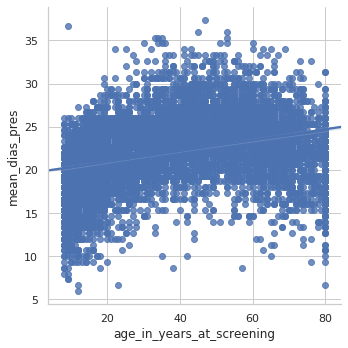


Gráfico de dispersión con el logarítmo aplicado de "age_in_years_at_screening" y "mean_sis_pres"



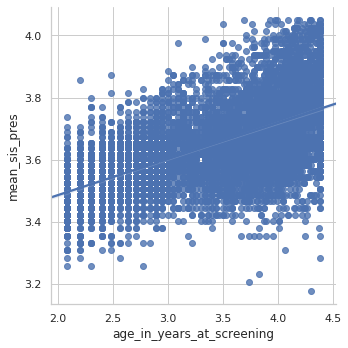


La correlación entre ambas variables es 0.5556343838497984


____________________________________________________________________________________________________




In [0]:
for df in relations_dfs:
  # Se crean los gráficos de dispersión:
  print(f'Gráfico de dispersión de "{ df.columns[1]}" y "{df.columns[2]}"\n')
  sns.lmplot(x = df.columns[1], y=df.columns[2], data=df.iloc[:,1:])
  plt.show()
  print()
  # Gráficos de dispersión habiendo aplicado logaritmo:
  print(f'Gráfico de dispersión con el logarítmo aplicado de "{ df.columns[1]}" y "{df.columns[2]}"\n')
  sns.lmplot(x = df.columns[1], y=df.columns[2], data=np.log(df.iloc[:,1:]))
  plt.show()
  # Se calcula la correlación:
  print(f'\nLa correlación entre ambas variables es {df.iloc[:,1].corr(df.iloc[:,2])}\n')
  print('\n' + '_'*100 + '\n\n')

  if len(df.columns) == 4:
    # Se crea el gráfico con la edad y la presión diastólica:
    print(f'Gráfico de dispersión de "{ df.columns[1]}" y "{df.columns[2]}"\n')
    sns.lmplot(x = df.columns[1], y= df.columns[3], data=df.iloc[:,1:])
    plt.show()
    print()
    # Gráficos de dispersión habiendo aplicado logaritmo:
    print(f'Gráfico de dispersión con el logarítmo aplicado de "{ df.columns[1]}" y "{df.columns[2]}"\n')
    sns.lmplot(x = df.columns[1], y=df.columns[2], data=np.log(df.iloc[:,1:]))
    plt.show()
    print(f'\nLa correlación entre ambas variables es {df.iloc[:,1].corr(df.iloc[:,2])}\n')
    print('\n' + '_'*100 + '\n\n')




## 11) Determine cuál es la probabilidad de que una persona padezca hepatitis A.

In [0]:
 # Se crea el DF
 hep_a_db = lab_res[['respondent_sequence_number', 'hepatitis_a_antibody']]
 # Se eliminan los valores nulos:
 hep_a_db = hep_a_db[hep_a_db.notnull()]
 # Se calculan los valores:
 hep_a_total = count(hep_a_db)
 hep_a_pos = count(hep_a_db[hep_a_db.hepatitis_a_antibody == 1])
 # Se calcula y muestra la probabilidad:
 print('La probabilidad de que una persona padezca hepatitis A es {} %'\
       .format(round((hep_a_pos / hep_a_total) * 100)))

La probabilidad de que una persona padezca hepatitis A es 49.0 %


## 12) Determine cuál es la probabilidad de que una persona sea hombre, de raza hispana, pese entre 60 y 80 kg, con sobrepeso y tenga hepatitis A. 


In [0]:
# Total de personas:
total = count(dem)

In [0]:
# Creación de la base de datos:
database = dem[['respondent_sequence_number', 'gender', 'race_hispanic_origin']]\
.merge(bm[['respondent_sequence_number', 'weight__kg_', 'body_mass_index__kg_m__2_']])\
.merge(lab_res[['respondent_sequence_number', 'hepatitis_a_antibody']])\
.dropna(axis='index') # Eliminación de nulos

# Hombre:
database = database[database.gender == 1]
# Raza hispana:
database = database[(database.race_hispanic_origin == 1) | (database.race_hispanic_origin == 2)]
# Que pese entre 60 y 80 kg:
database = database[(database.gender > 60) & (database.gender < 80)]
# Con sobrepeso ( 25 < IMC < 29.9):
database = database[(database.body_mass_index__kg_m__2_ > 25) & (database.body_mass_index__kg_m__2_ <29.9)]
# Con hepatitis A:
database = database[database.hepatitis_a_antibody == 1]

# Cálculo de la probabilidad:
print('''La probabilidad de que una persona sea hombre, de raza hispana, que 
pese entre 60 y 80 kg, con sobrepeso y con hepatitis A es {} %'''\
.format((count(database) / total)* 100))

La probabilidad de que una persona sea hombre, de raza hispana, que 
pese entre 60 y 80 kg, con sobrepeso y con hepatitis A es 0.0 %


## 13) Determine cuál es la probabilidad de que una persona que ha vivido entre 10 a 15 años en US, este graduado de la universidad, casado y posea niveles de insulina superiores a 90. 

In [0]:
# Creación de la base de datos:
database = dem[['respondent_sequence_number', 'length_of_time_in_us', 
                'education_level__20__years', 'marital_status']]\
.merge(lab_res[['respondent_sequence_number', 'insulin__uu_ml_']])\
.dropna(axis='index') # Eliminación de nulos

# Ha vivido entre 10 y 15 años en EEUU:
database = database[(database.length_of_time_in_us > 10) & (database.length_of_time_in_us < 15)]
# Graduade de la universidad:
database = database[database.education_level__20__years == 5]
# Casade:
database = database[database.marital_status == 1]
# Insulina superior a 90:
database = database[database.insulin__uu_ml_ > 90]

# Cálculo de la probabilidad:
print('''La probabilidad de que una persona que ha vivido entre 10 a 15 años 
en US, este graduado de la universidad, casado y posea niveles de insulina 
superiores a 90 es {} %'''\
.format((count(database) / total)* 100))

La probabilidad de que una persona que ha vivido entre 10 a 15 años 
en US, este graduado de la universidad, casado y posea niveles de insulina 
superiores a 90 es 0.0 %


## 14) Determine cuál es la probabilidad de que una persona entre 30 y 40 años, de raza hispana, casado o divorciado, con un ingreso anual del hogar entre USD$15,000 y USD$35,000 y que tenga clamidia

In [0]:
# Creación de la base de datos:
database = dem[['respondent_sequence_number', 'age_in_years_at_screening',
                'race_hispanic_origin', 'marital_status', 
                'annual_household_income']]\
.merge(lab_res[['respondent_sequence_number', 'urinary_chlamydia']])\
.dropna(axis='index') # Eliminación de nulos

# Tiene entre 30 y 40 años:
database = database[(database.age_in_years_at_screening > 30) & (database.age_in_years_at_screening < 40)]
# Raza hispana:
database = database[(database.race_hispanic_origin == 1) | (database.race_hispanic_origin == 2)]
# Casade o divorciade:
database = database[(database.marital_status == 1) | (database.marital_status == 3)]
# Ingreso anual entre 15000 y 35000 USD:
database = database[(database.annual_household_income > 3) & (database.annual_household_income < 7)]
# Con Clamidia:
database = database[database.urinary_chlamydia == 1]

# Cálculo de la probabilidad:
print('''La probabilidad de que una persona entre 30 y 40 años, de raza hispana,
 casado o divorciado, con un ingreso anual del hogar entre USD 15,000 y
 USD 35,000 y que tenga clamidia es {} %'''\
.format((count(database) / total)* 100))

La probabilidad de que una persona entre 30 y 40 años, de raza hispana,
 casado o divorciado, con un ingreso anual del hogar entre USD 15,000 y
 USD 35,000 y que tenga clamidia es 0.0 %
